In [1]:
## TODO:
# - Understand different instance of observation
# - plot per instance (all passbands) per target
# - plot all instance (all passband) per target
# - plot all instance per target per passband

%matplotlib inline

import copy 
import numpy as np
import pandas as pd
from pandas import Timestamp
import matplotlib.pyplot as plt
from astropy.time import Time
from datetime import datetime
import matplotlib.dates as mdates
from IPython.core.debugger import Tracer

In [2]:
def extract_and_segregrate_data(training_set_with_target, columns=['flux']):
    # brightness_instances -  each key is target value
    # brightness_instances[target] - each key is the day datetime and values contains flux and time stamp
    # target_array, brightness_array, timestamp_array - contains the said values with index matching

    ## change mjd to human readable
    training_set_with_target['datatime'] = Time(training_set_with_target.mjd.values, format='mjd').to_value('datetime64')
    training_set_with_target['datatime_day'] = training_set_with_target['datatime'].dt.floor('D')
    
    ## initialize empty variables
    brightness_instances={}
    target_array = np.empty([1])
    brightness_array = np.empty([1, len(columns)])
    timestamp_array = np.empty([1], dtype='datetime64[ns]')
    
    ## extracts unique targets
    training_set_with_target_small = training_set_with_target
    targets = training_set_with_target_small.target.unique()
    
    ## loop over each target 
    for target in targets:
    
        ## initialize empty dicts
        brightness_instances[target]={}
        target_brightness_instances={}

        ## extract particular rows
        columns_all = copy.deepcopy(columns) 
        columns_all.append('datatime'); columns_all.append('datatime_day')

        target_rows = pd.DataFrame(training_set_with_target_small[training_set_with_target_small['target']==target])
        brightness_values = target_rows[columns_all]
        
        ## groupby dates
        dates = training_set_with_target_small.datatime_day.unique()
            
        for date in dates:
            
            ## extracting the values for each date
            target_brightness_instances[date] = brightness_values[brightness_values['datatime_day']==date]

            ## creating numpy arrays
            np_target = target*np.ones([len(brightness_values[brightness_values['datatime_day']==date]),1])
            np_timestamp1 = np.array(target_brightness_instances[date].datatime.values).reshape(-1,1)
            
            ## given columns
            np_brightness = np.array(target_brightness_instances[date][columns].values)

            ## Appending
            target_array = np.append(target_array, np_target)
            brightness_array = np.vstack((brightness_array, np_brightness))
            timestamp_array = np.append(timestamp_array, np_timestamp1)
        
        ## dict update
        brightness_instances[target] = target_brightness_instances
    
    ## removing the empty first row
    target_array = target_array[1:]
    brightness_array = brightness_array[1:]
    timestamp_array = timestamp_array[1:]
    
    return brightness_instances, target_array, brightness_array, timestamp_array
    
training_set_with_target = pd.read_csv('/home/vicky/workspace/projects/plasticc/data/training_set_with_target.csv')
training_set_with_target.head()
(
    columns_instances, 
    target_array, 
    columns_array, 
    timestamp_array
) = extract_and_segregrate_data(training_set_with_target, columns=['object_id' ,'flux', 'passband'])

In [36]:
## target
training_set_with_target.target.unique()

array([92, 88, 42, 90, 65, 16, 67, 95, 62, 15, 52,  6, 64, 53])

In [39]:
## object_id 
training_set_with_target.object_id.unique()[:10]

array([ 615,  713,  730,  745, 1124, 1227, 1598, 1632, 1920, 1926])

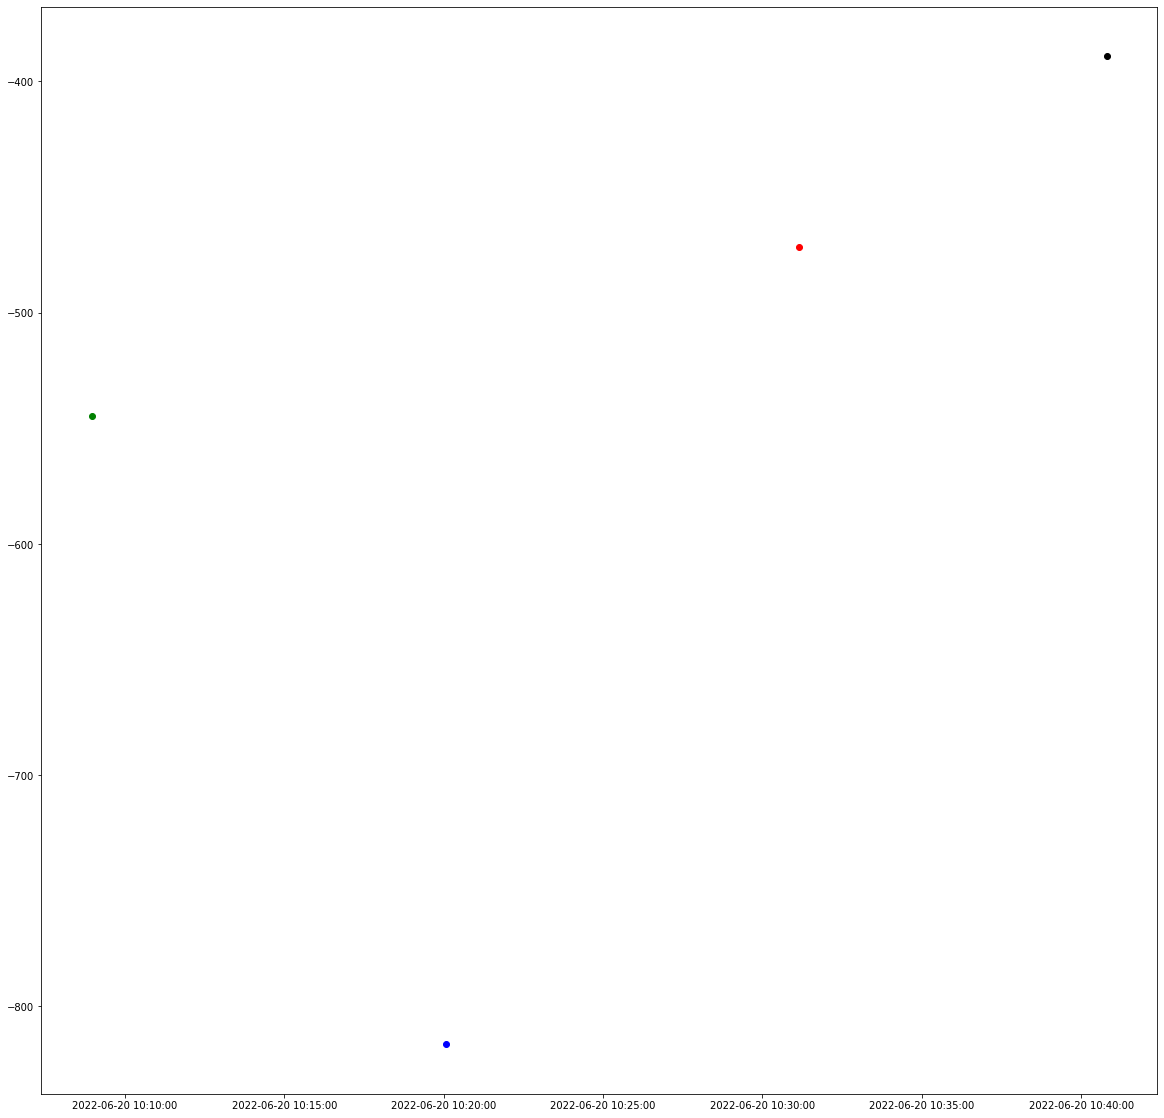

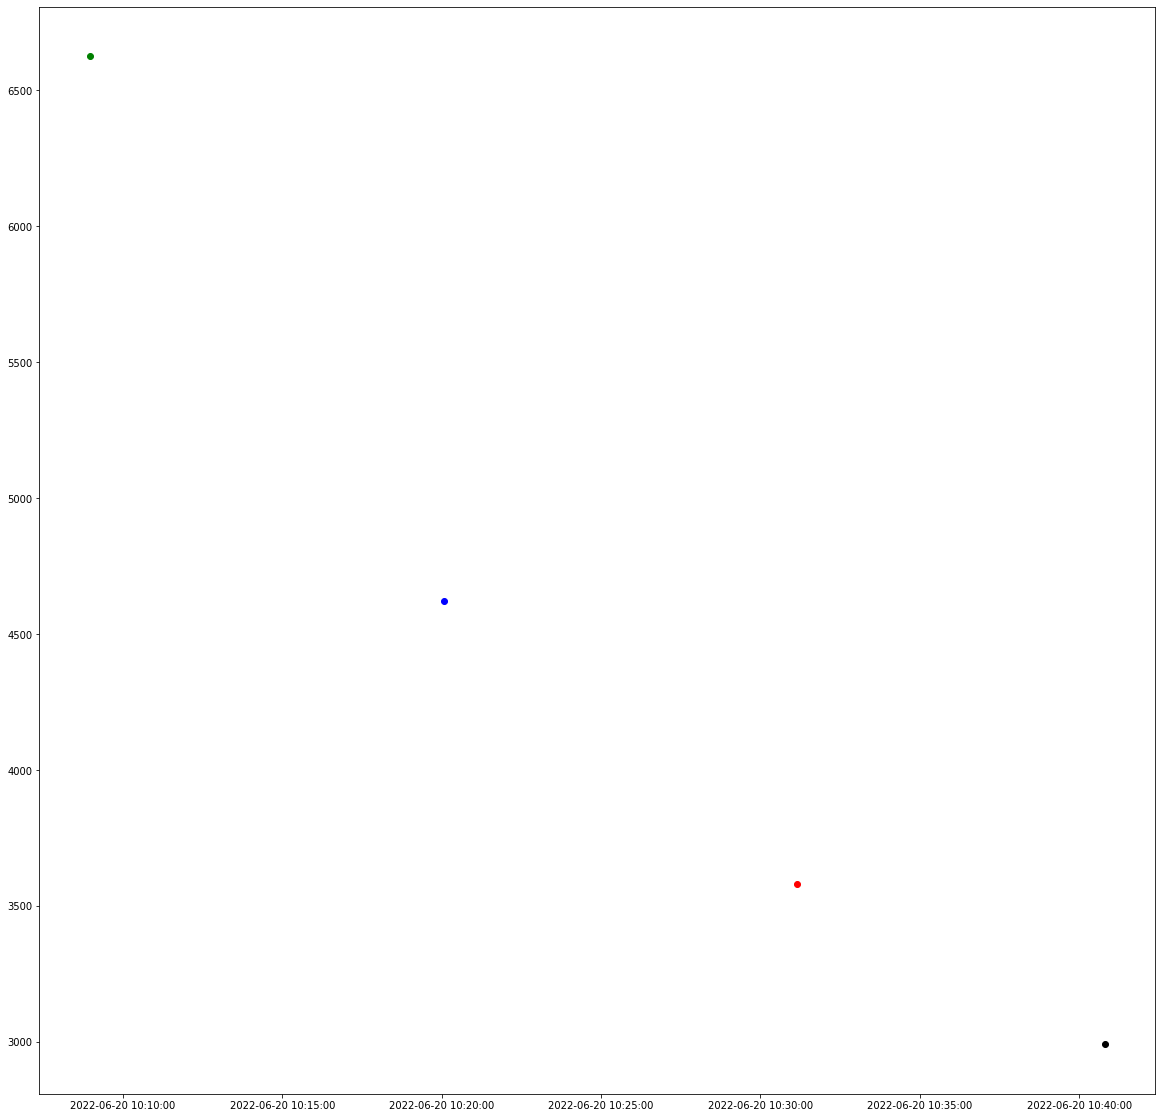

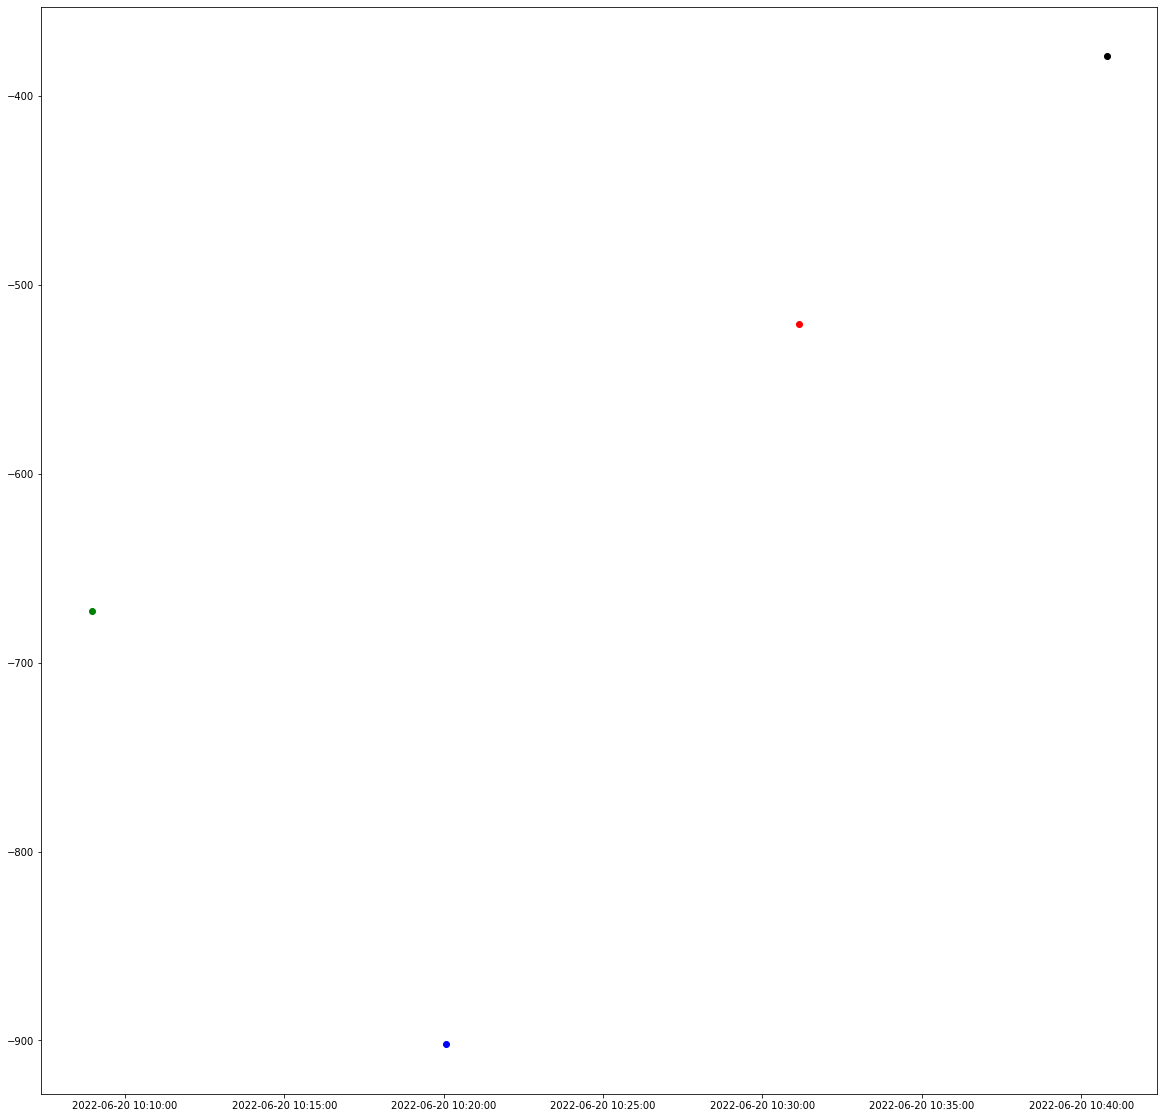

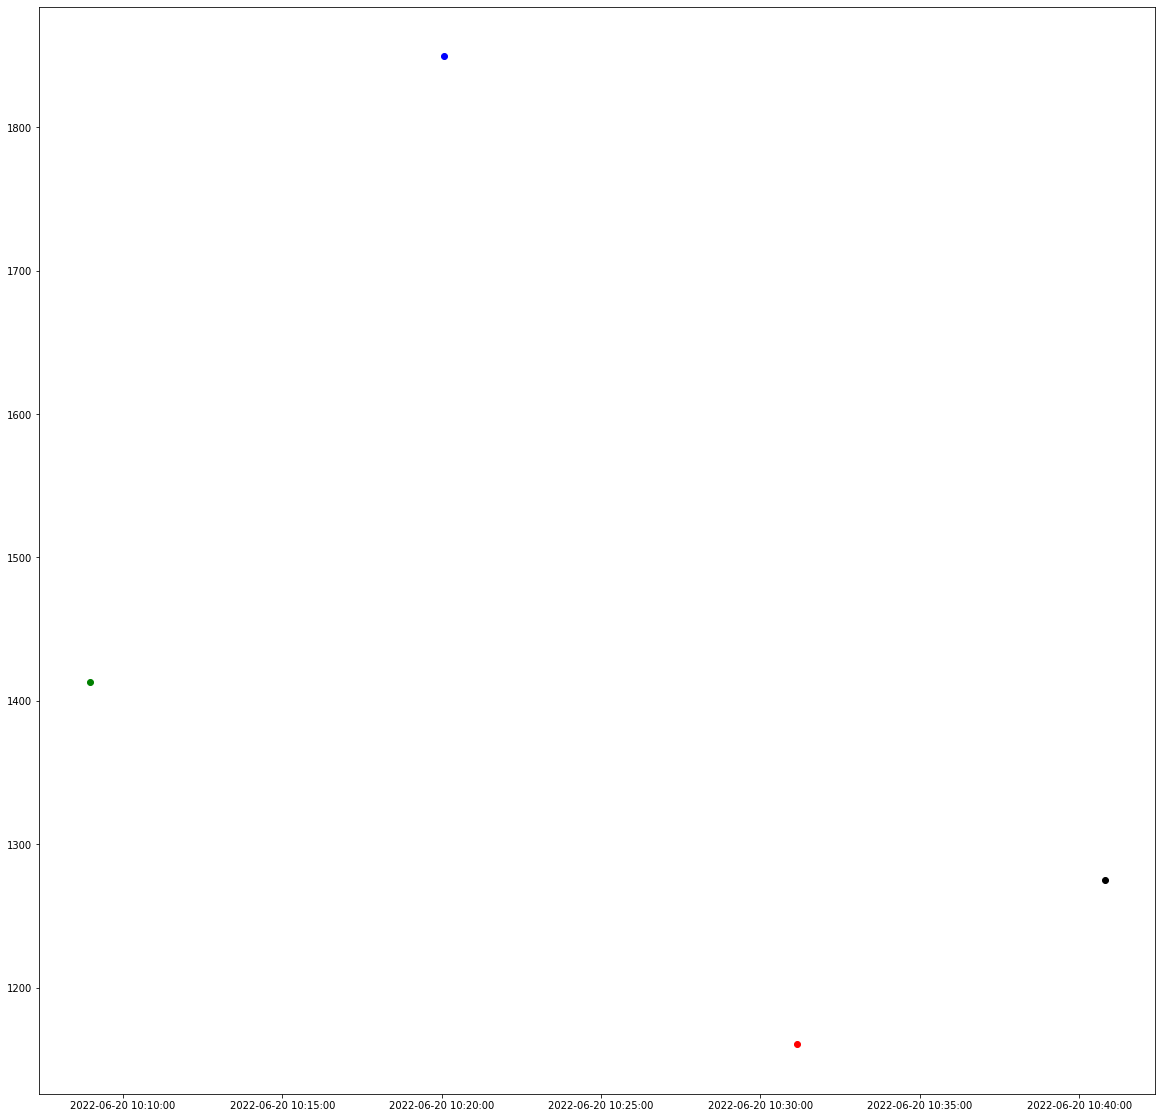

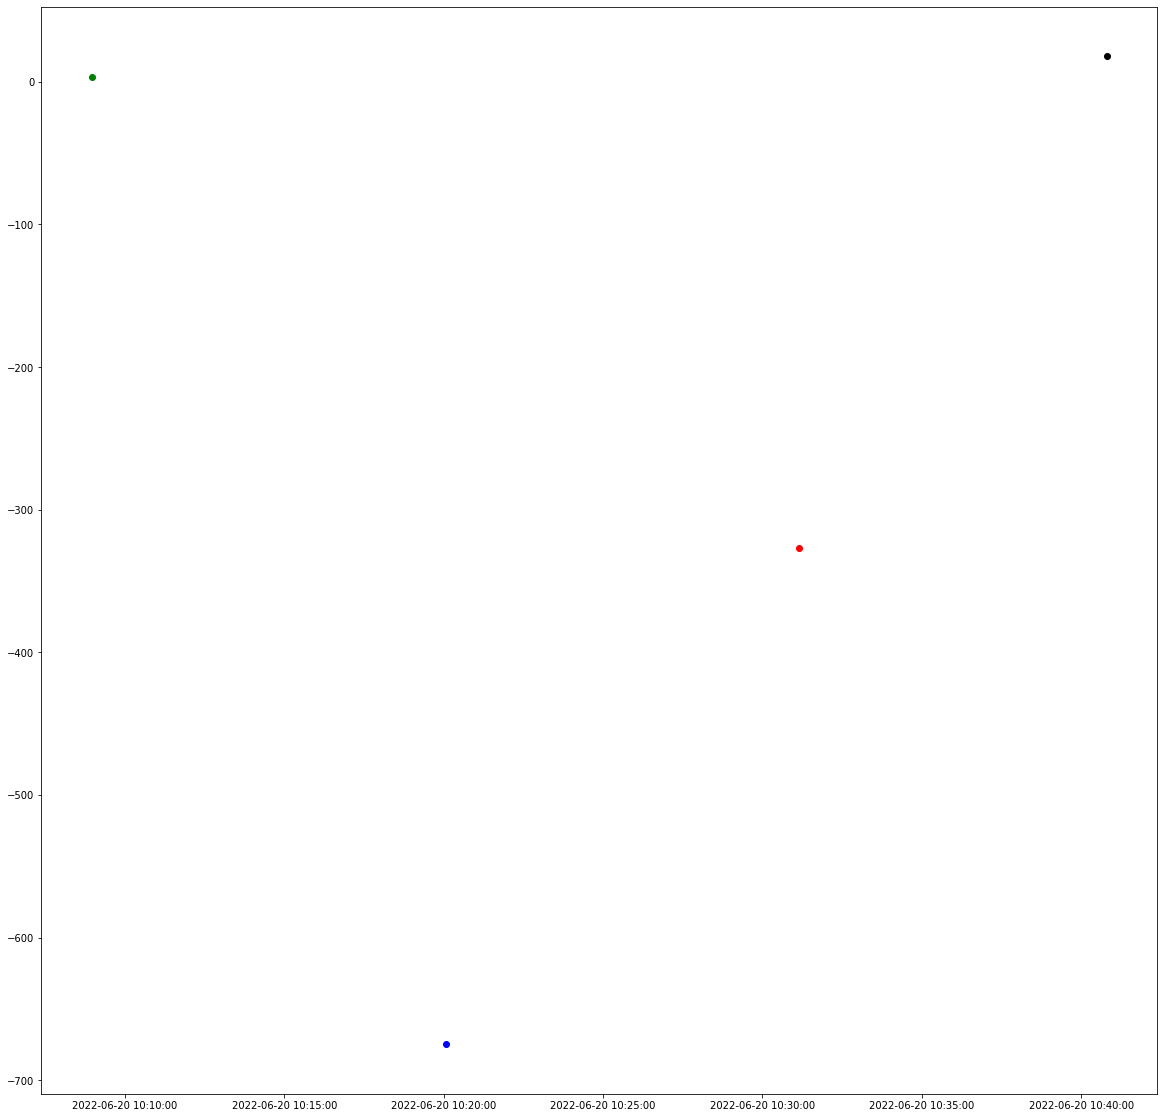

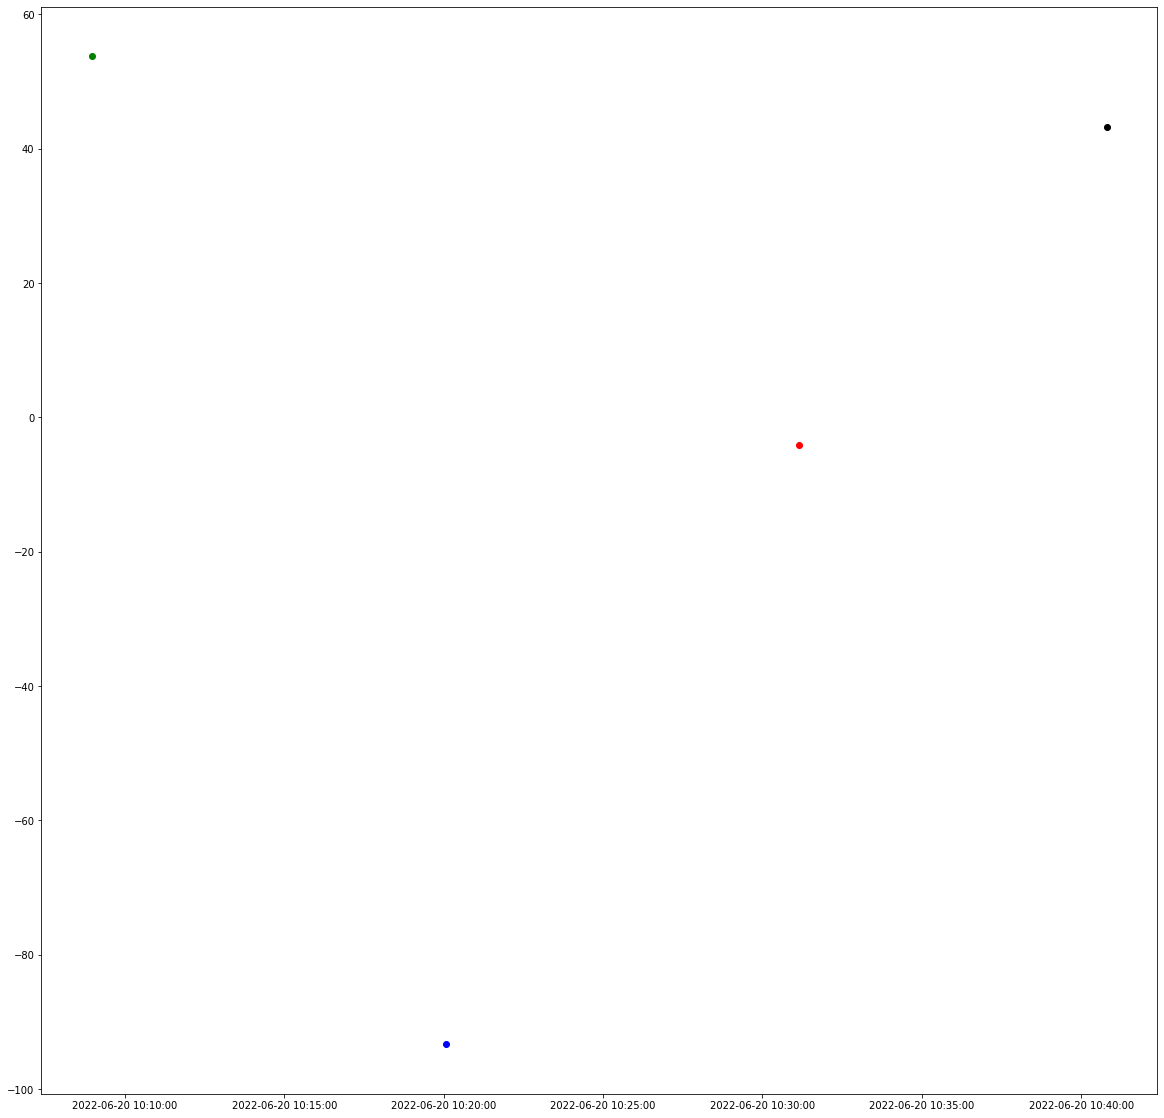

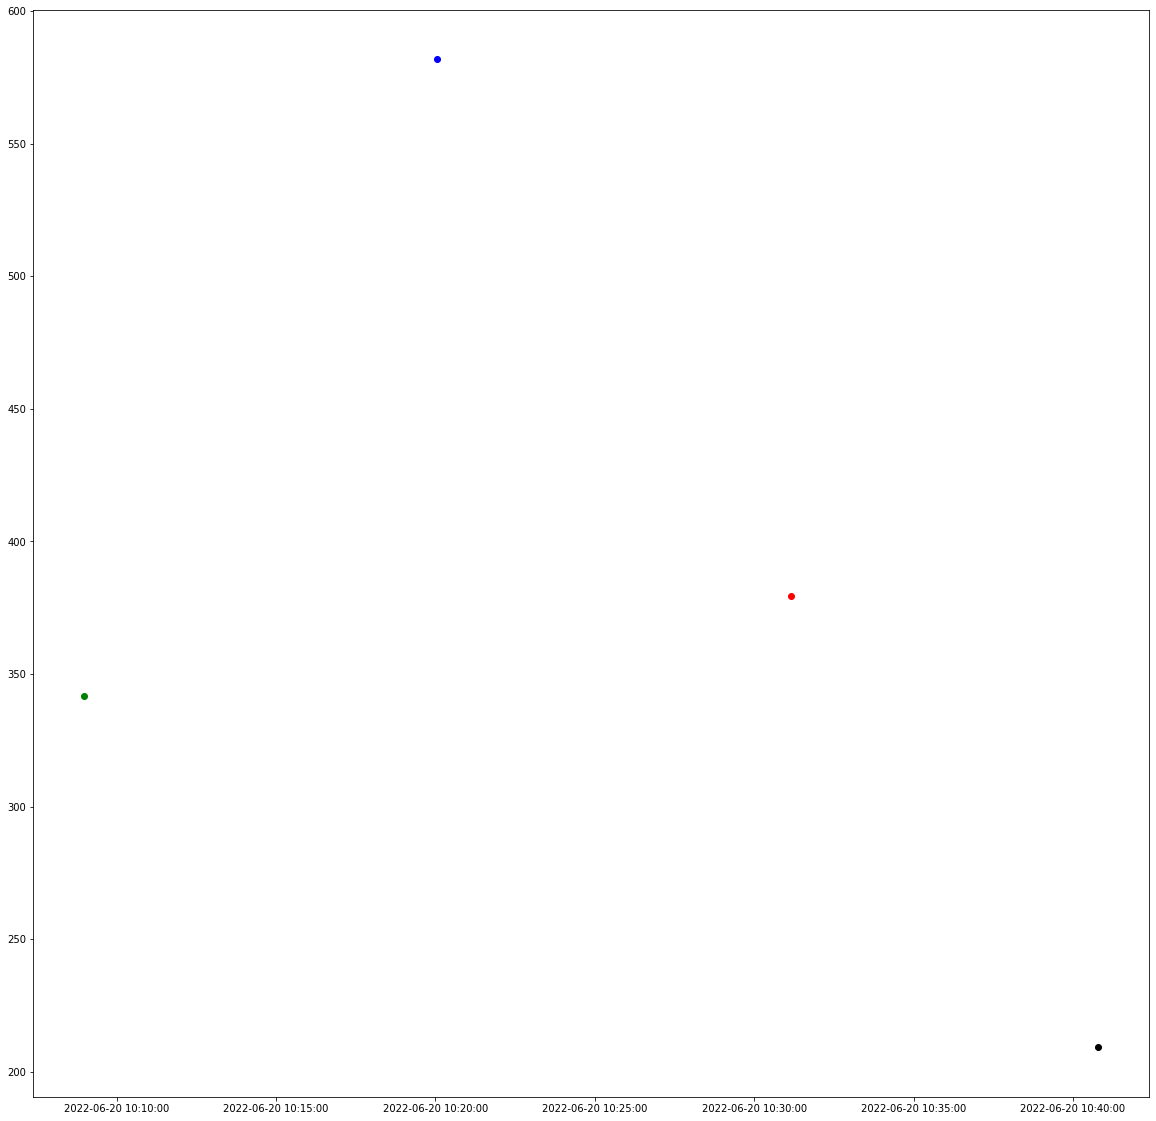

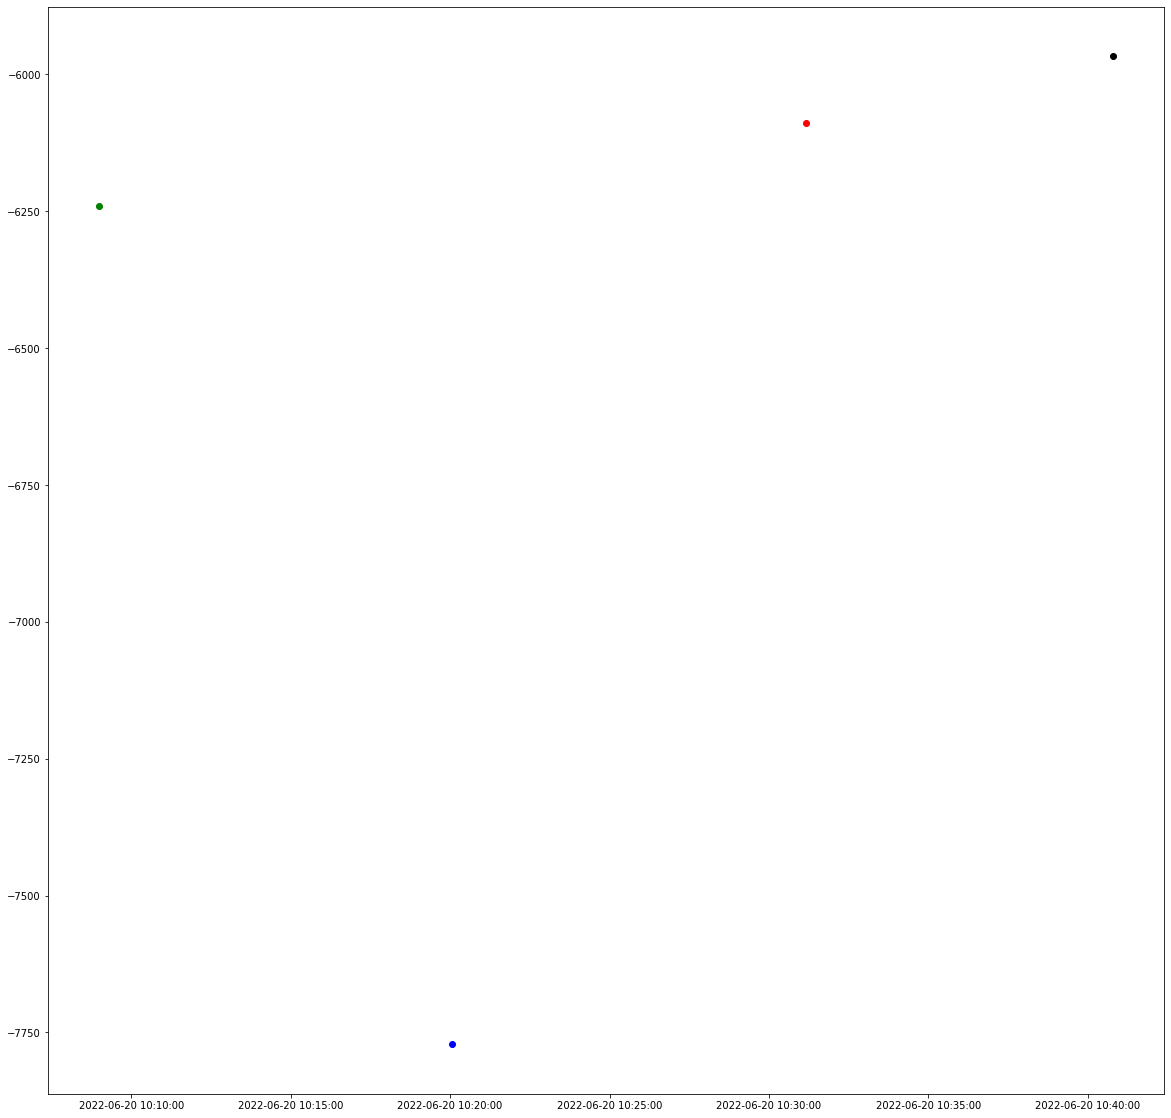

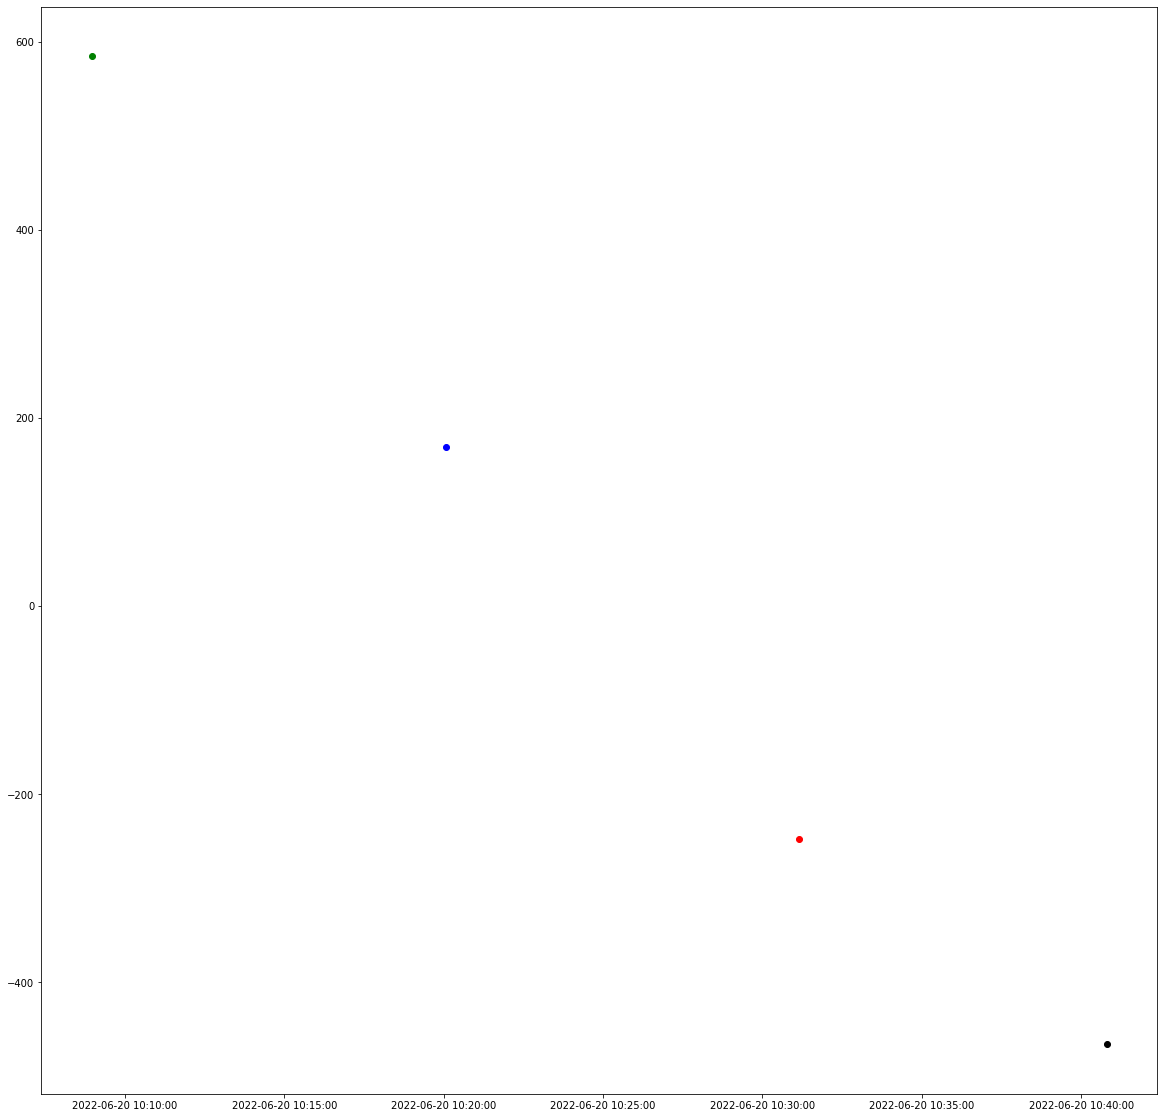

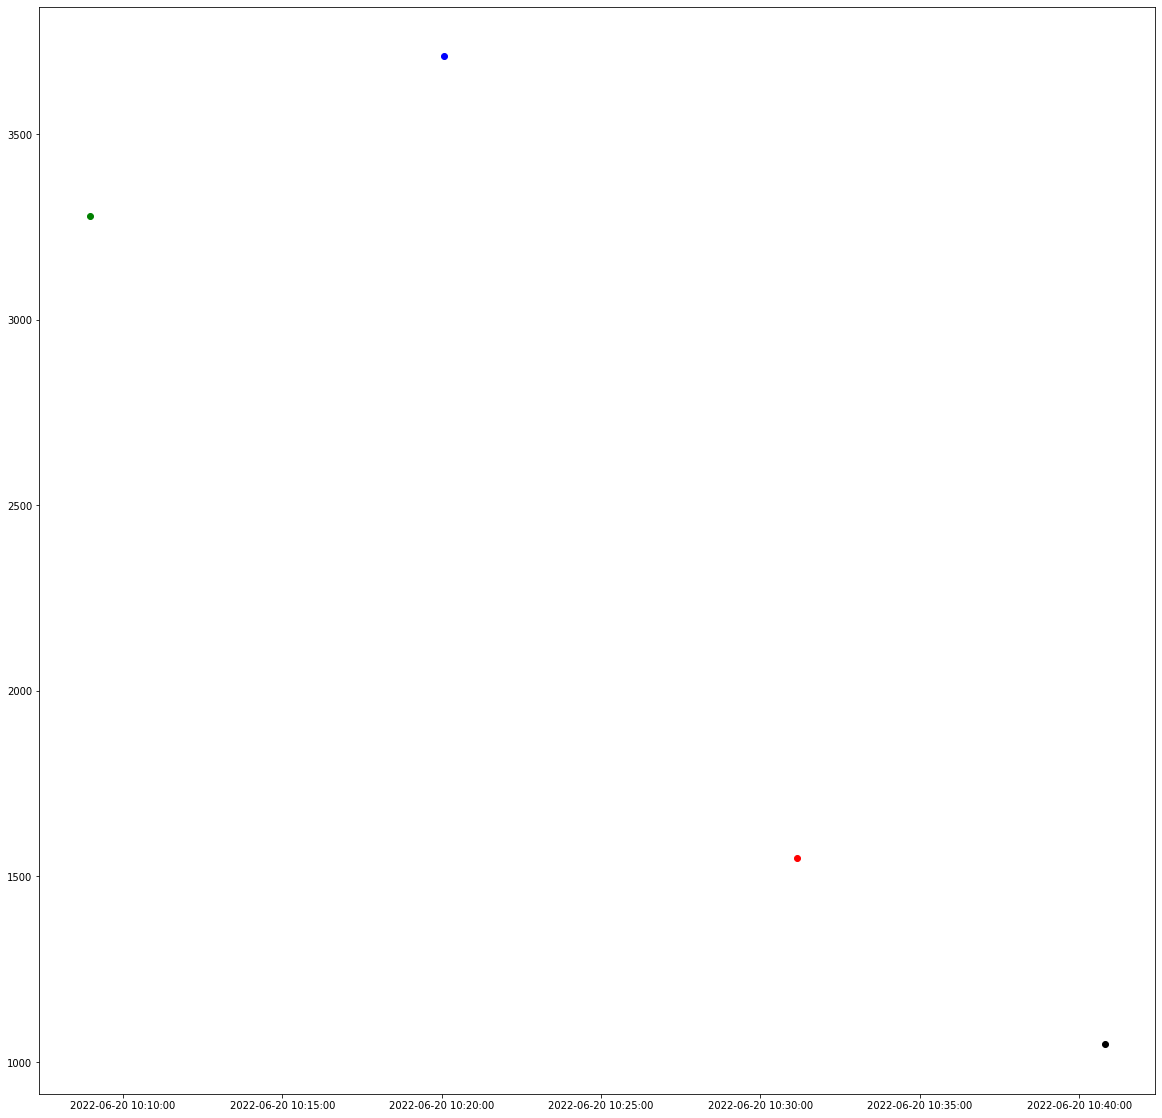

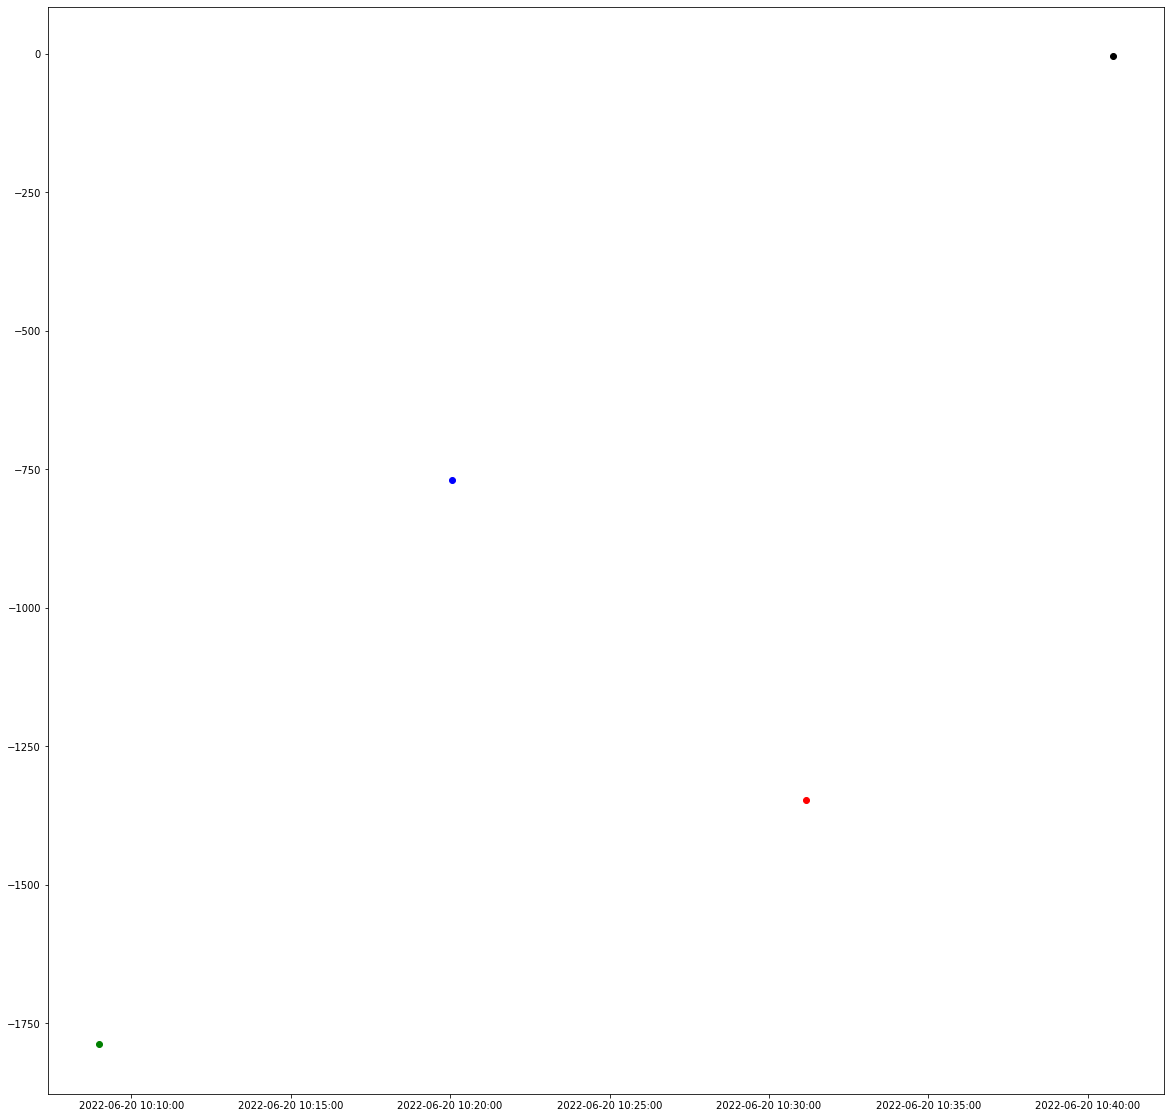

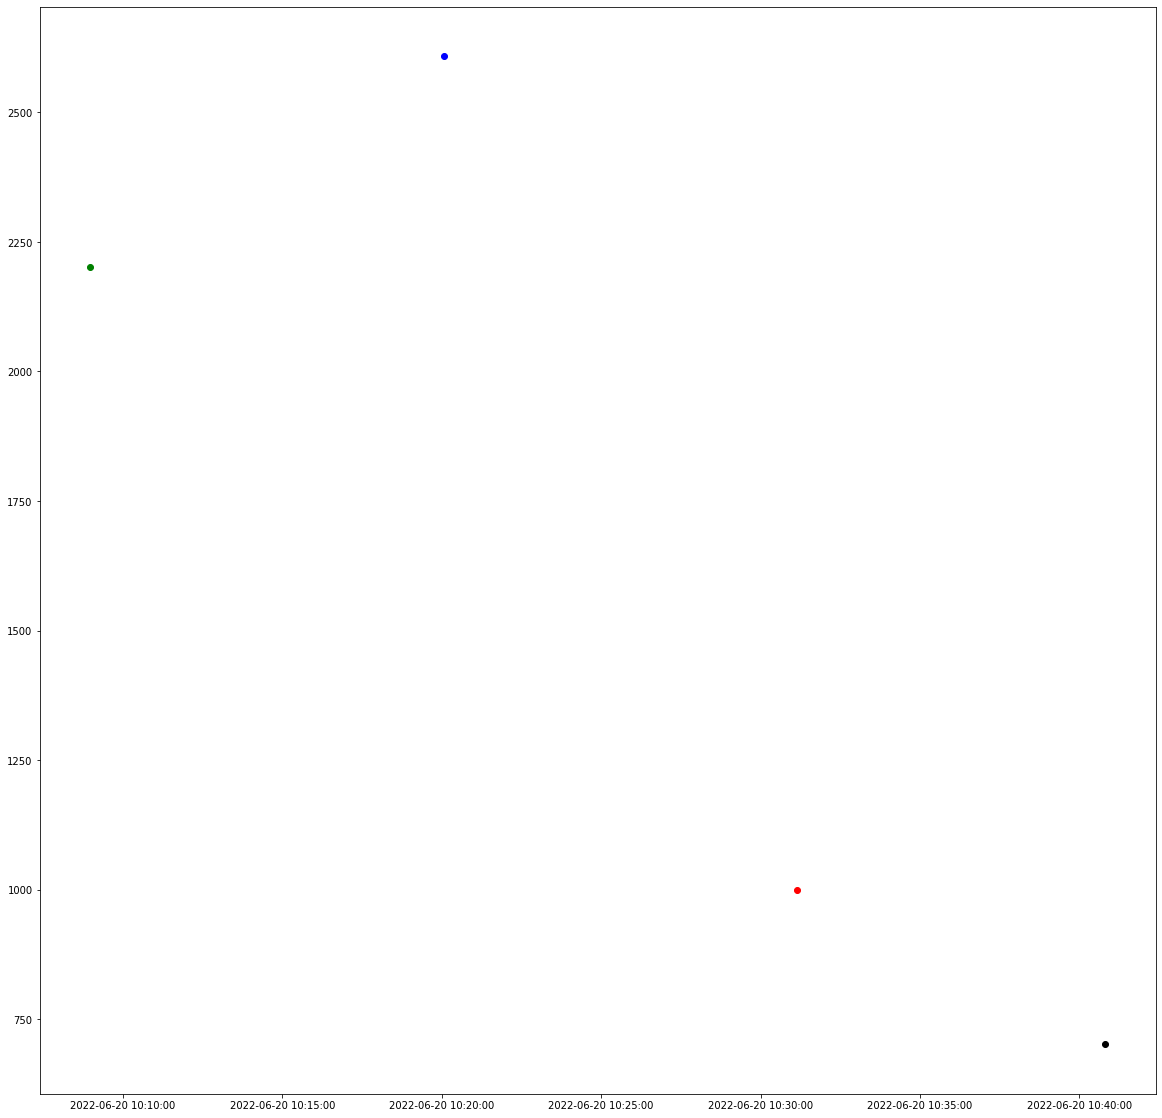

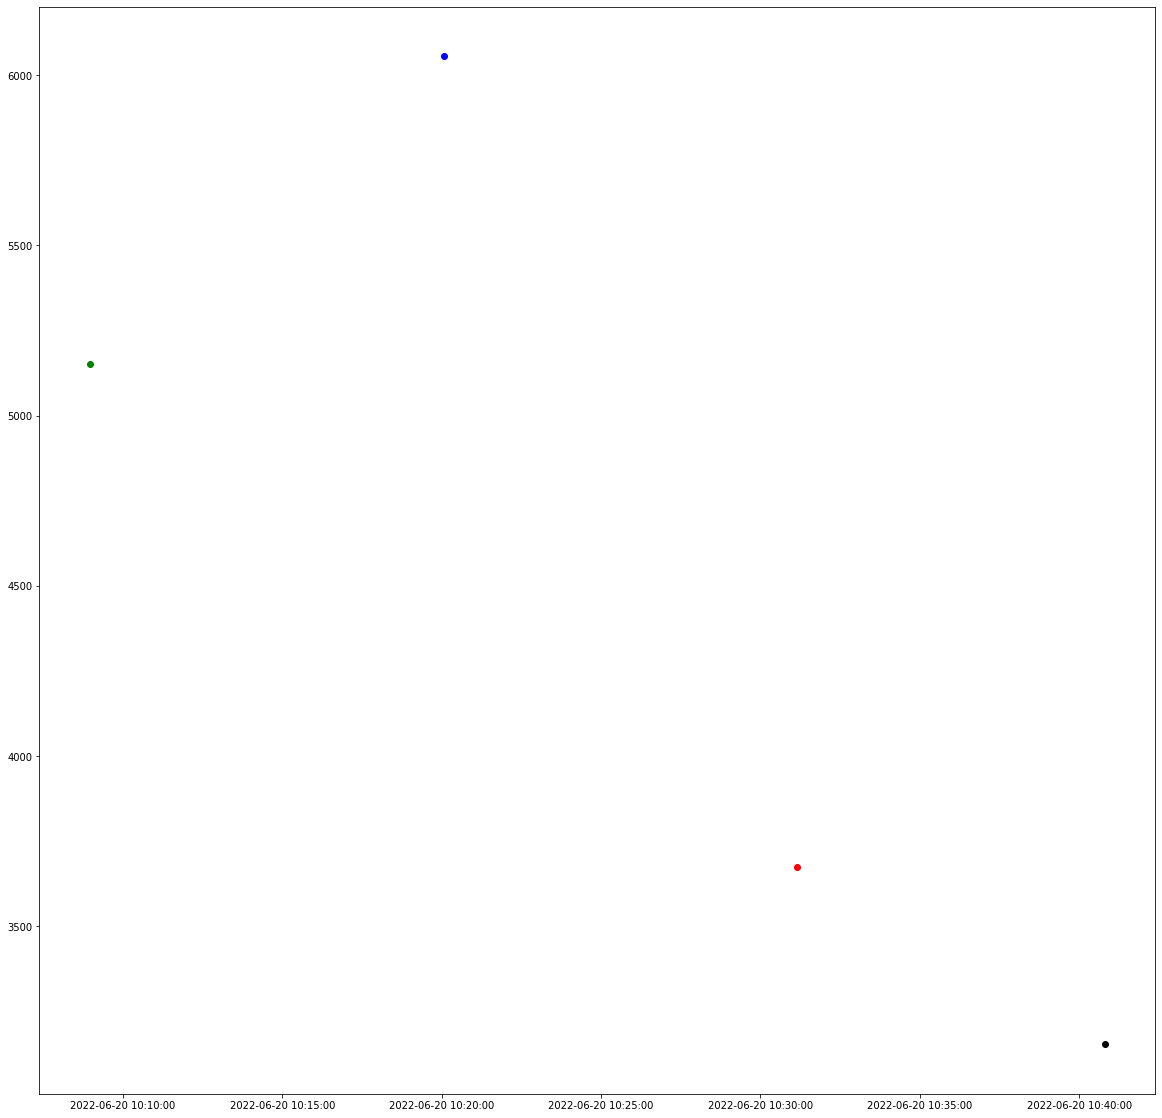

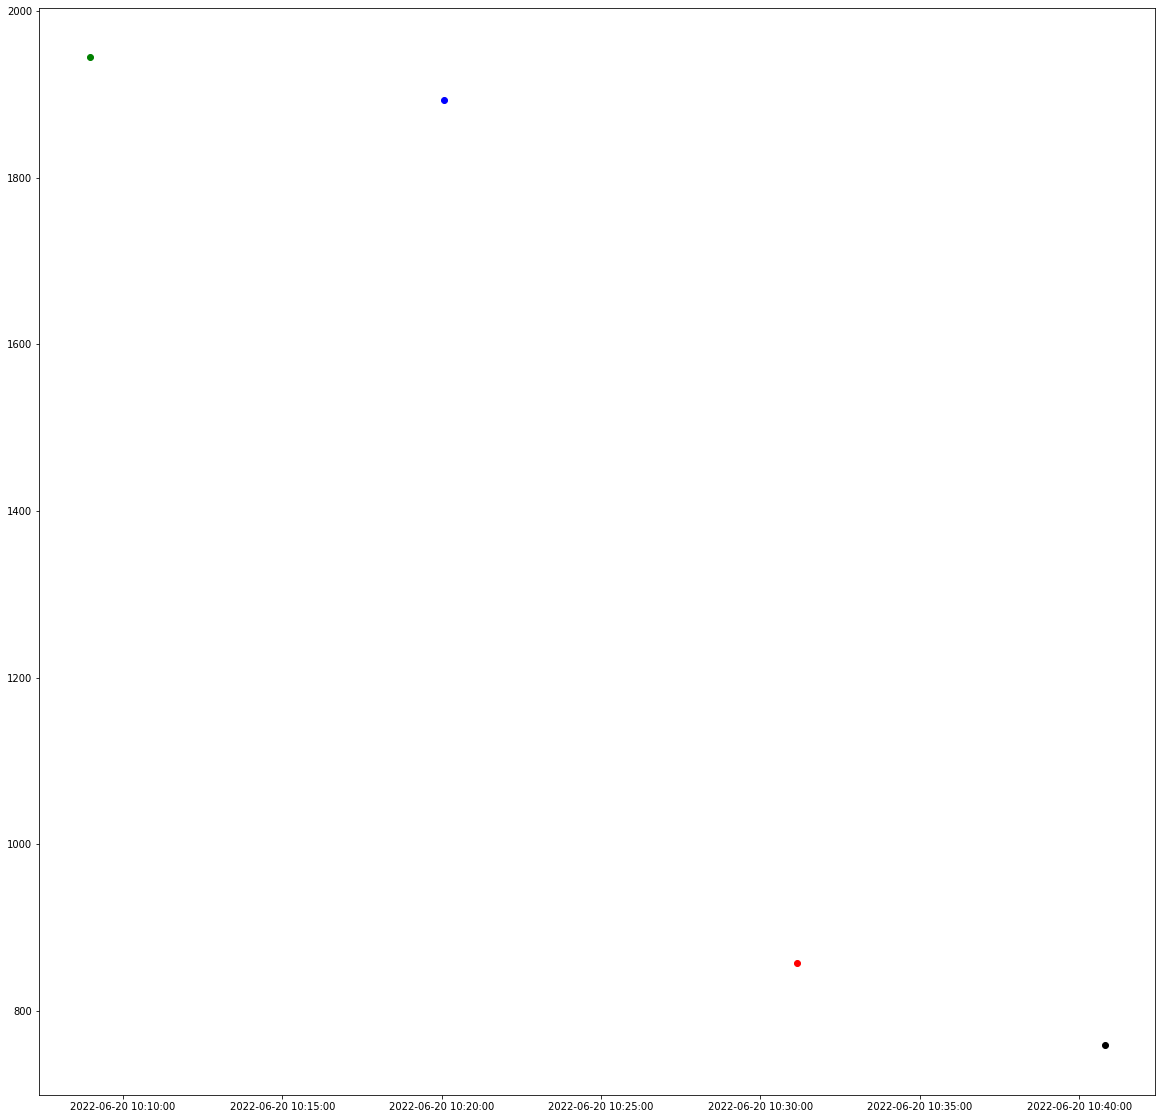

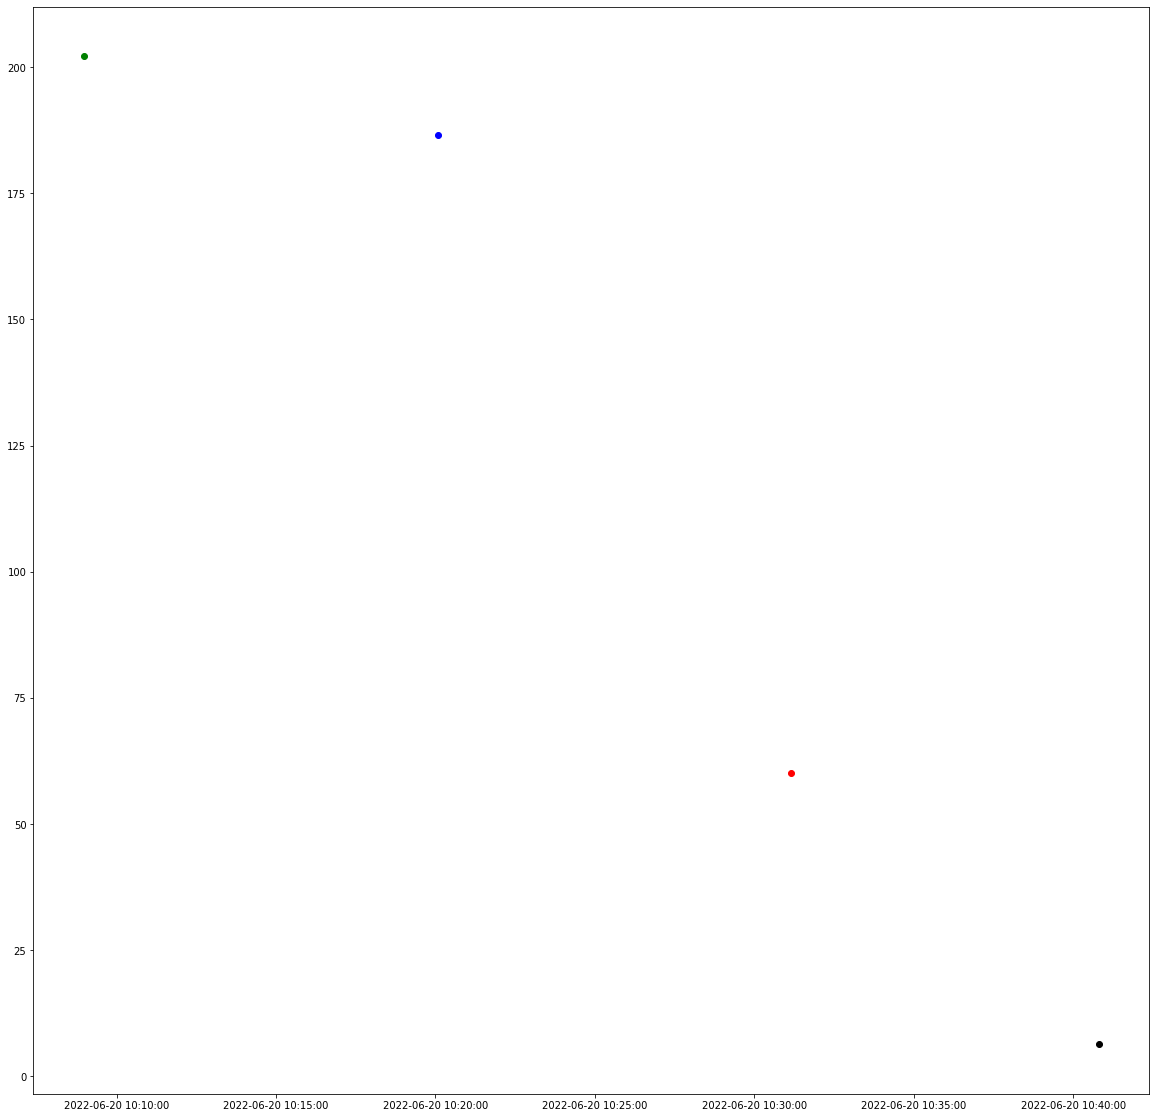

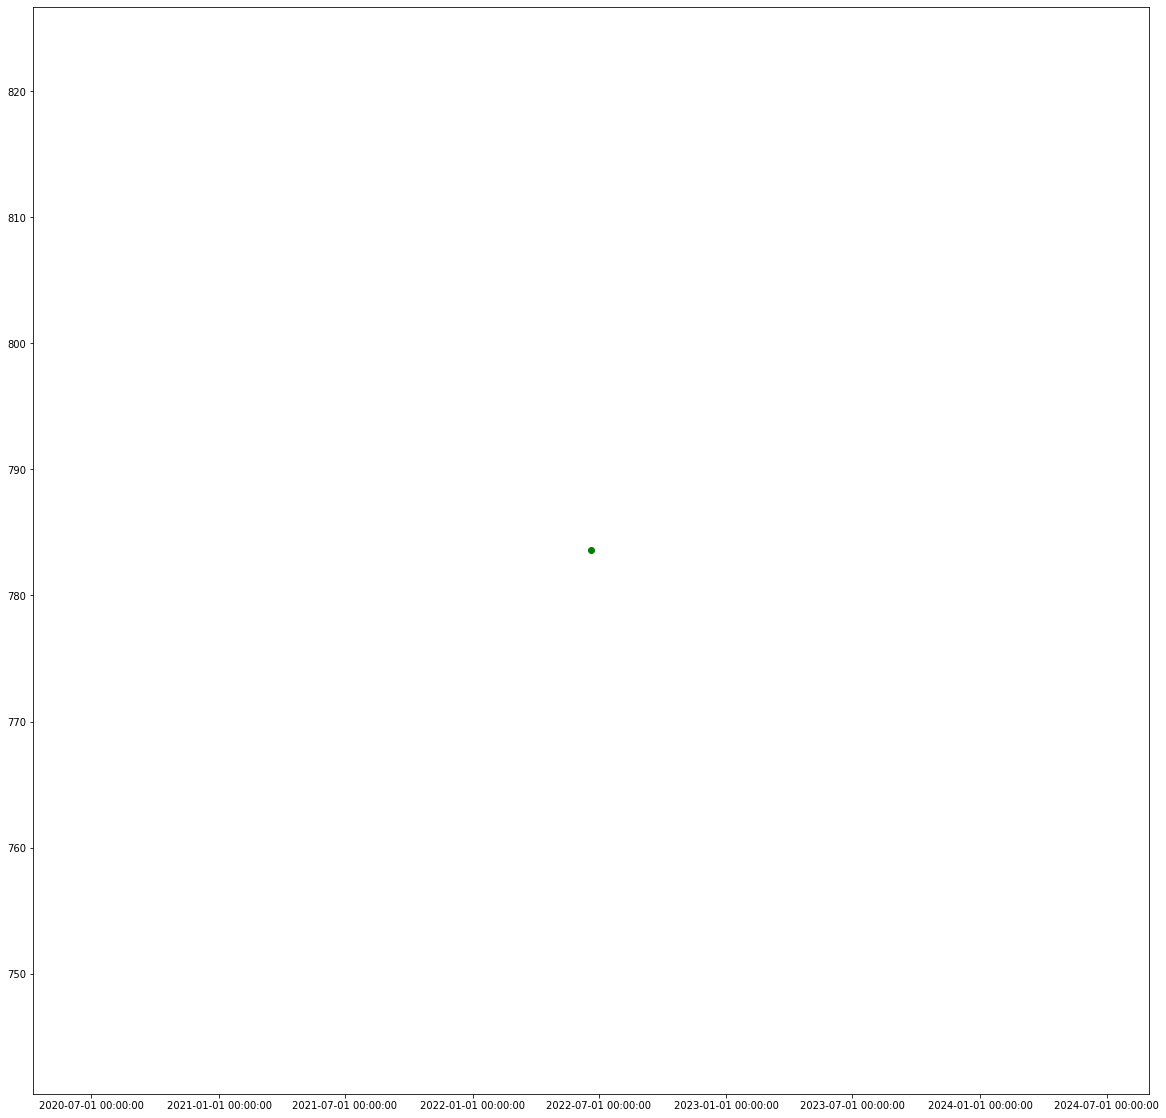

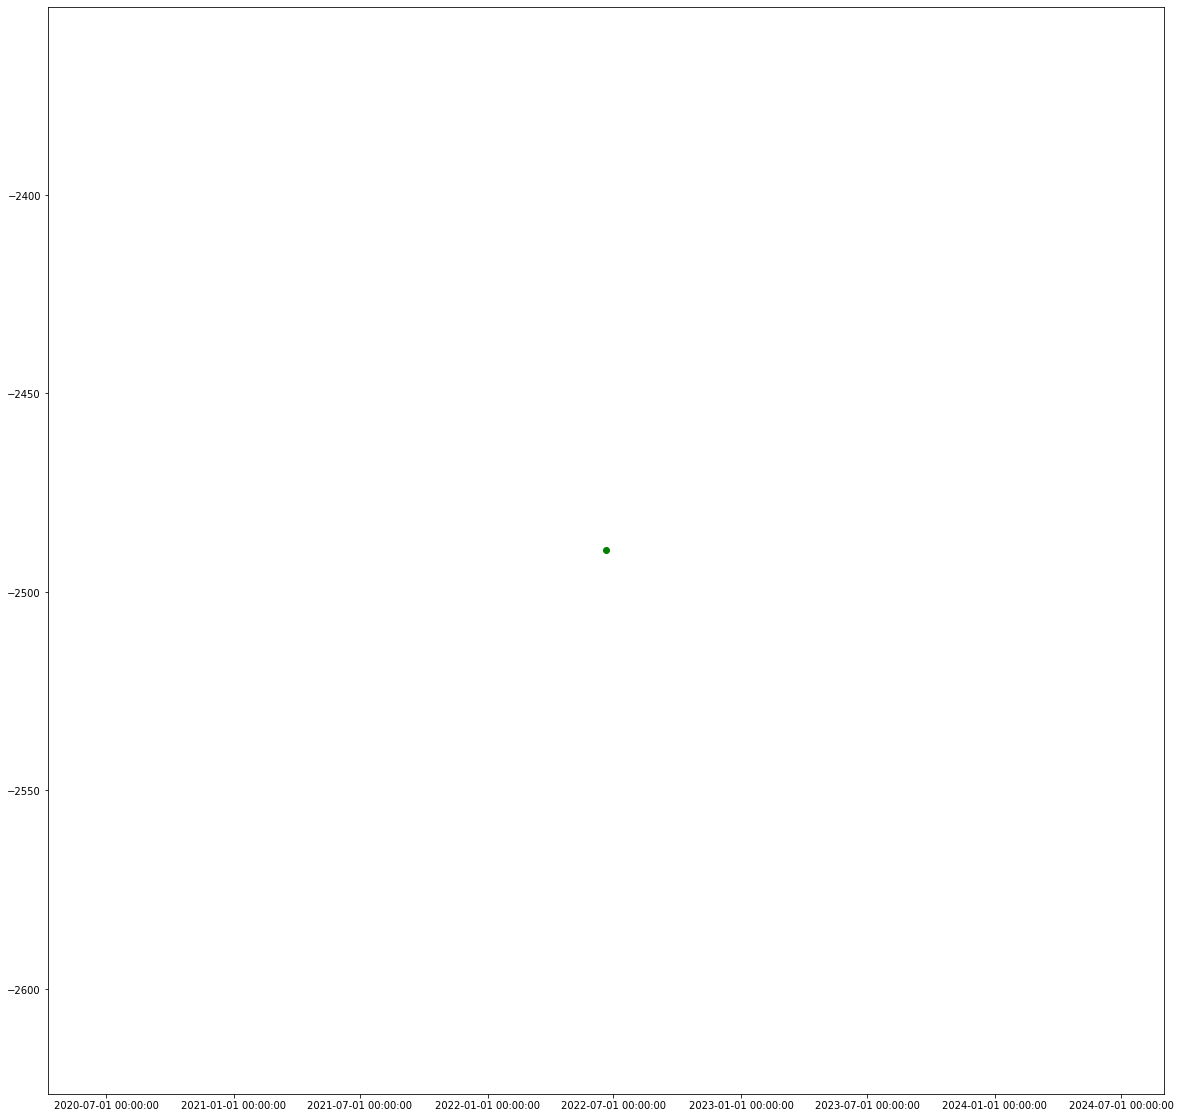

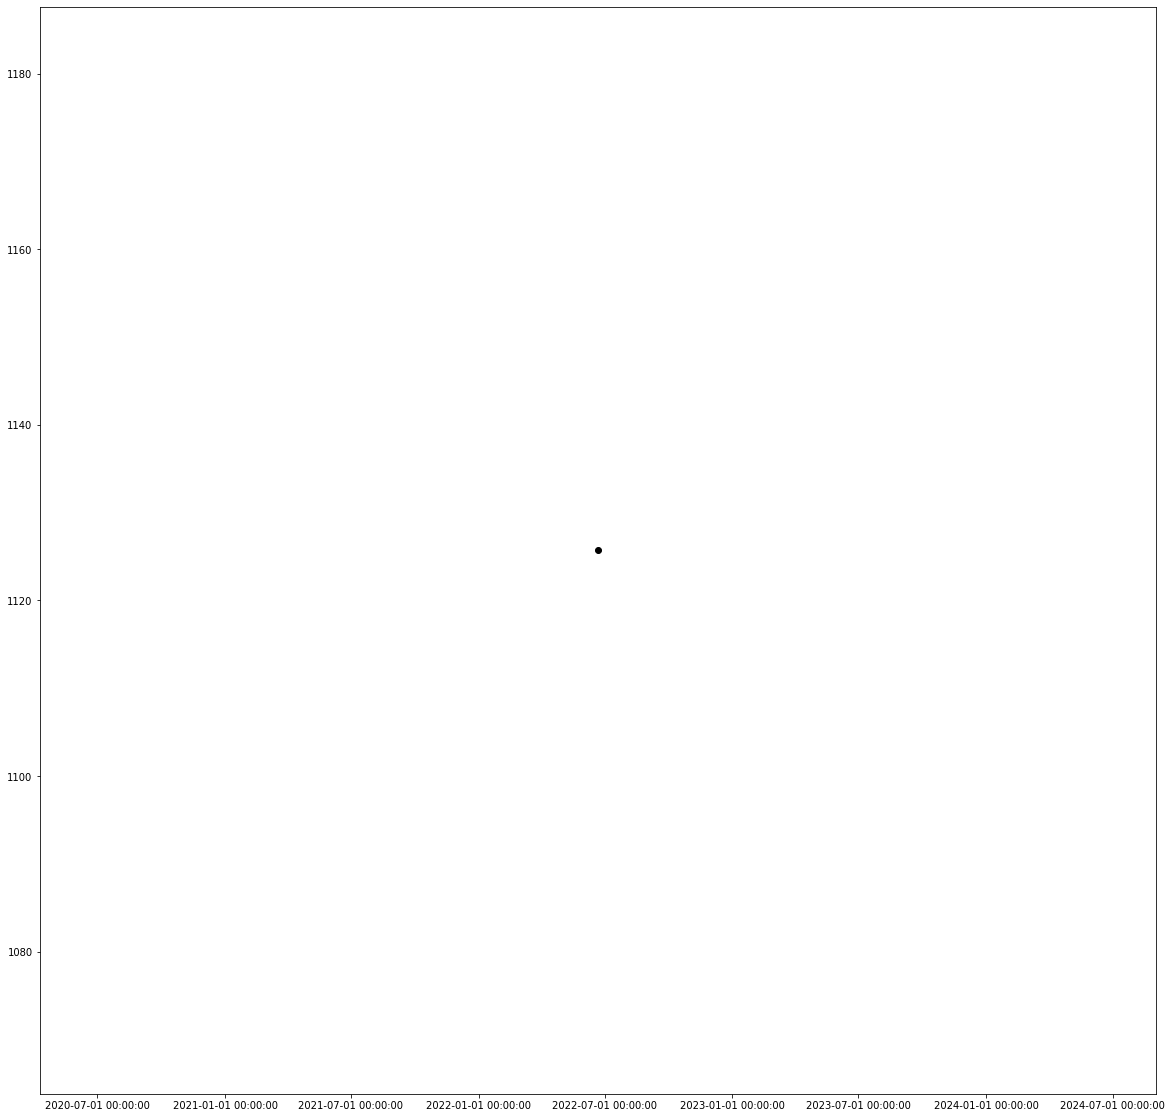

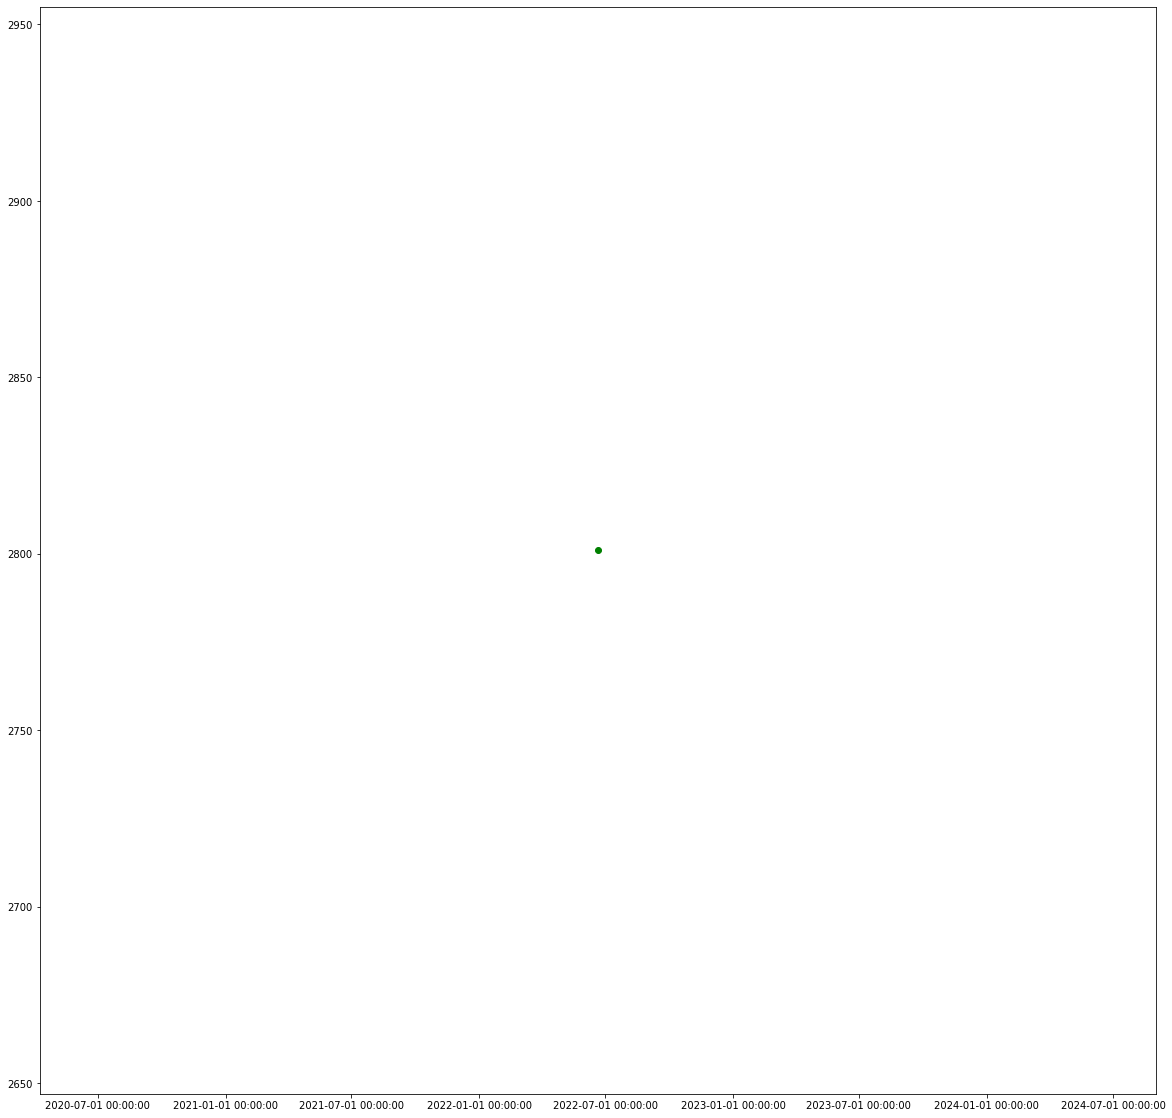

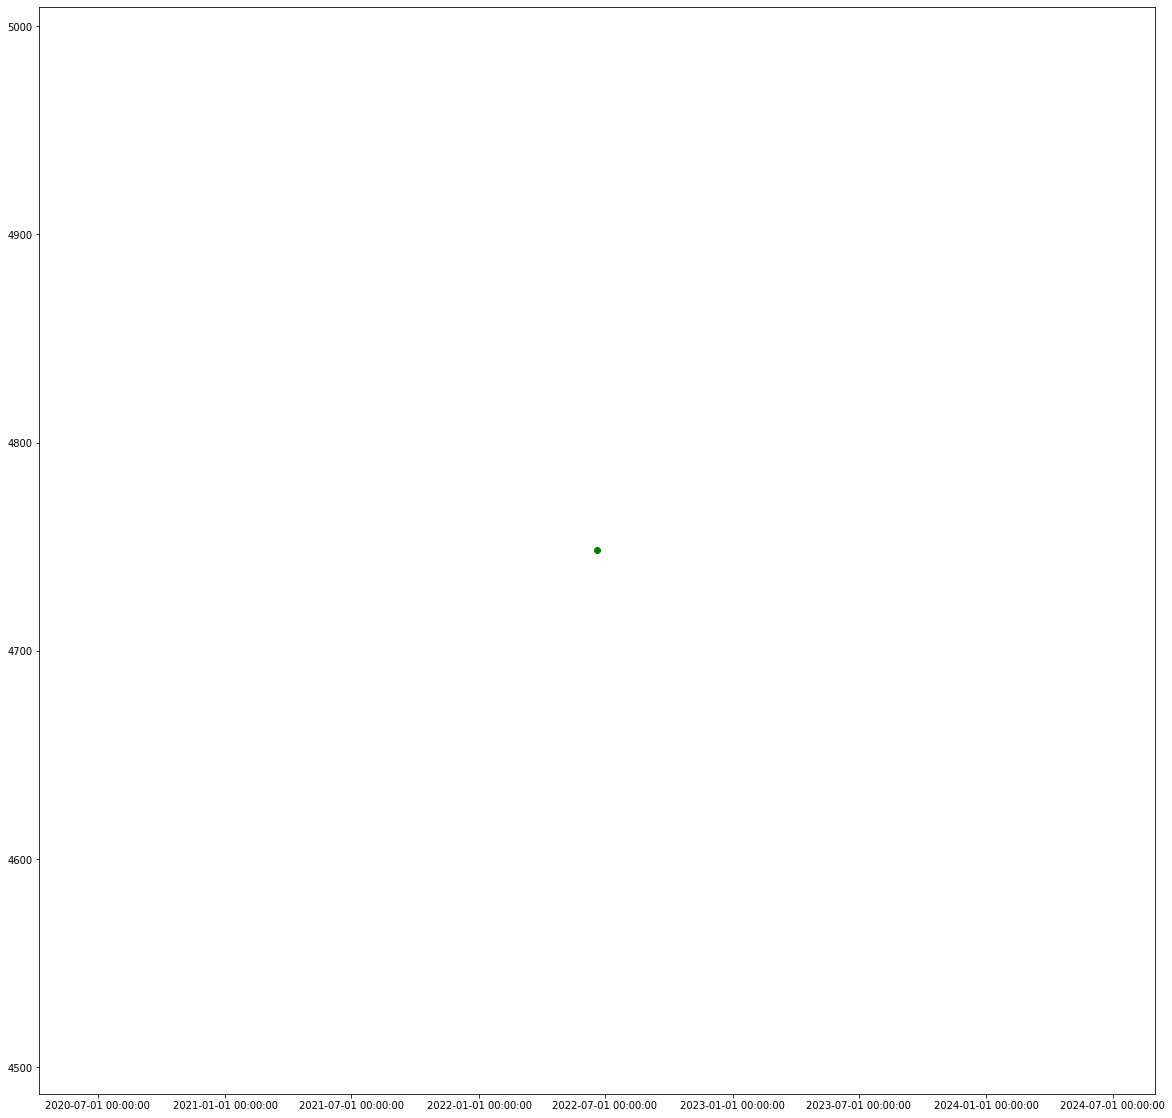

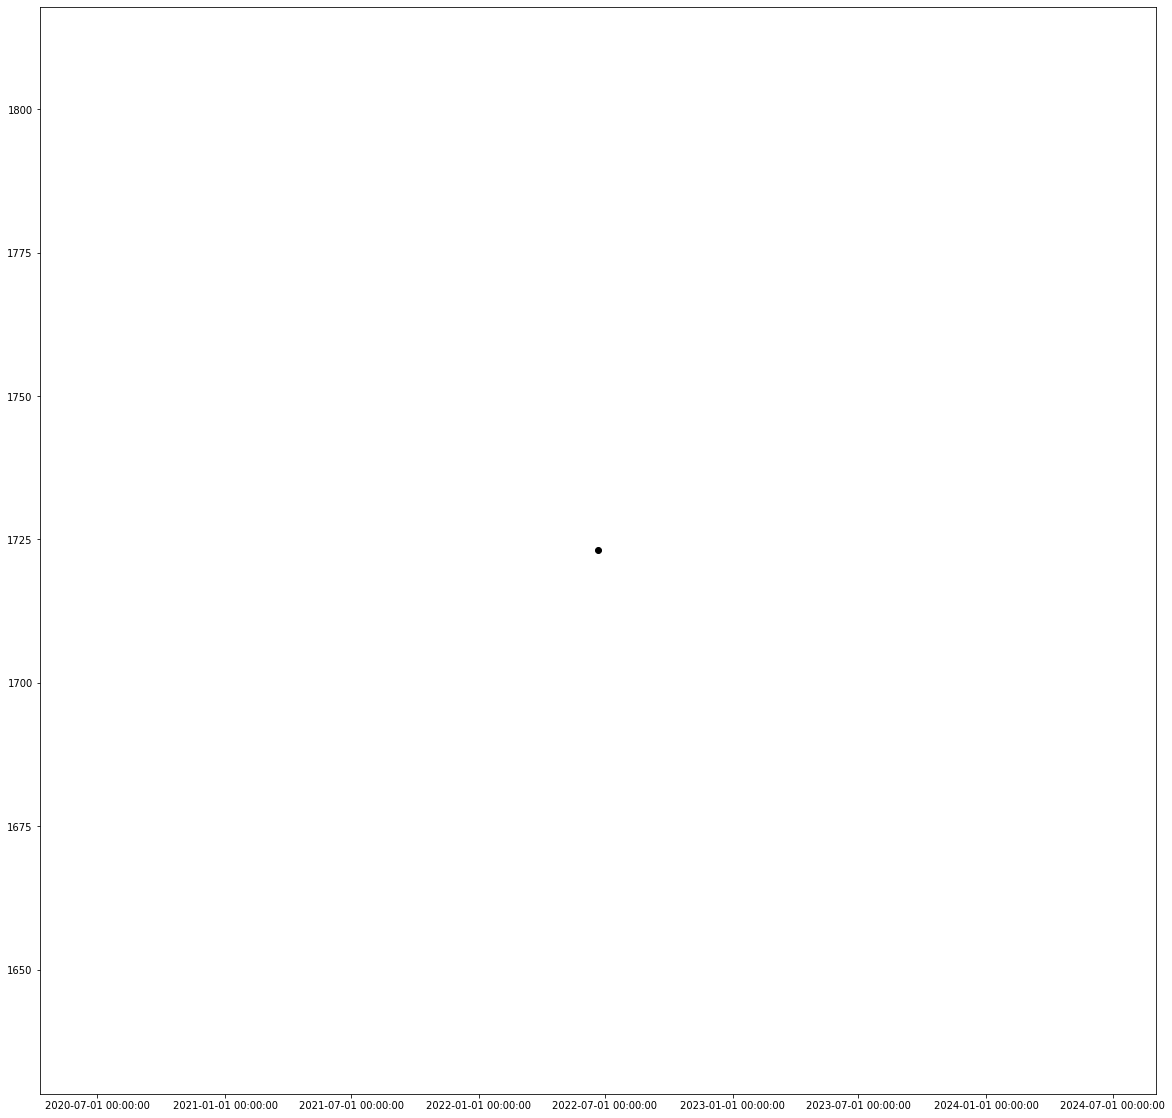

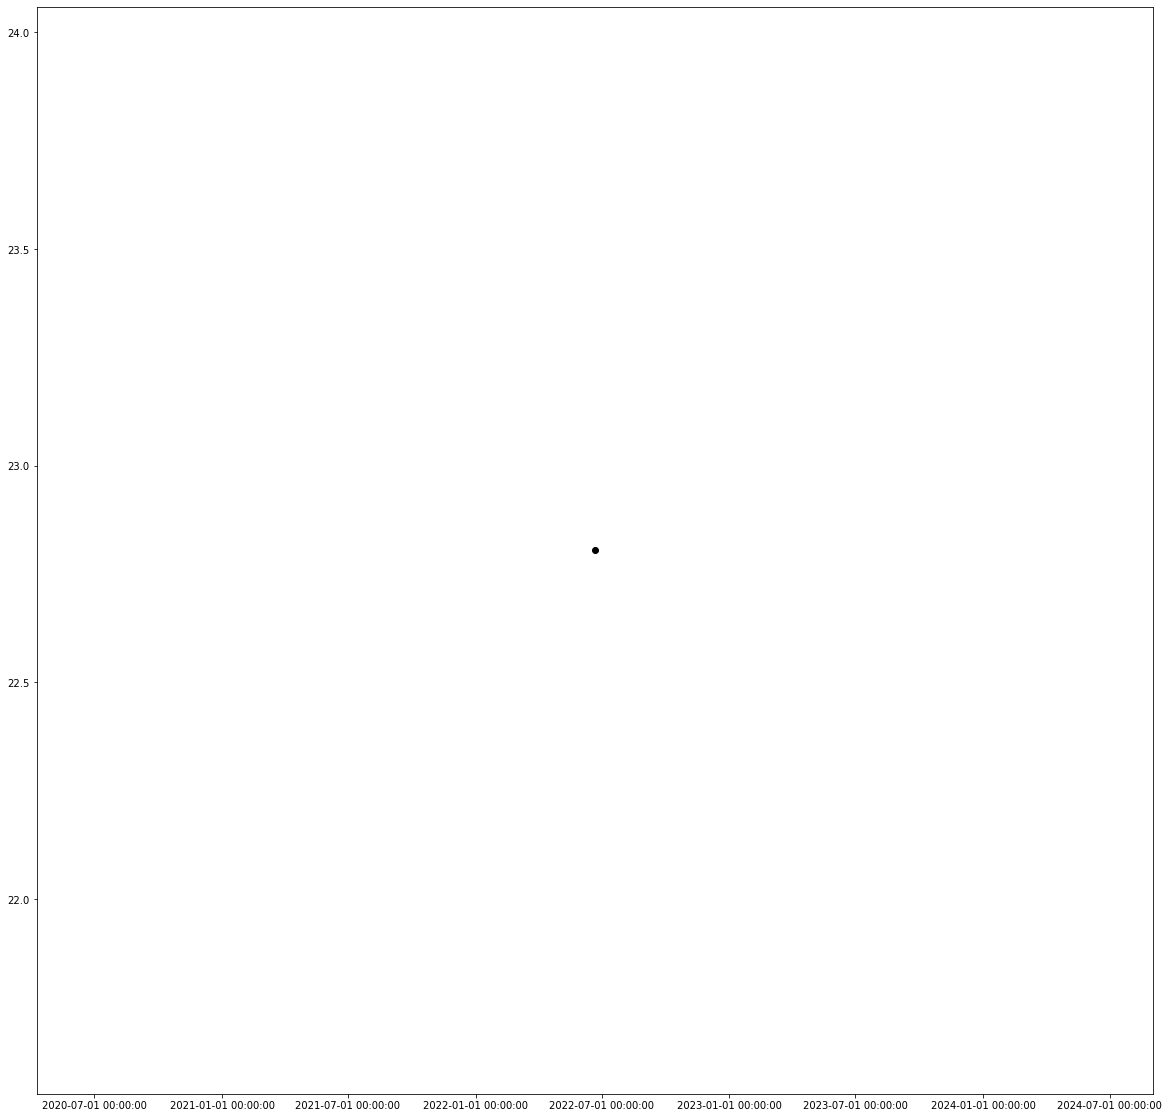

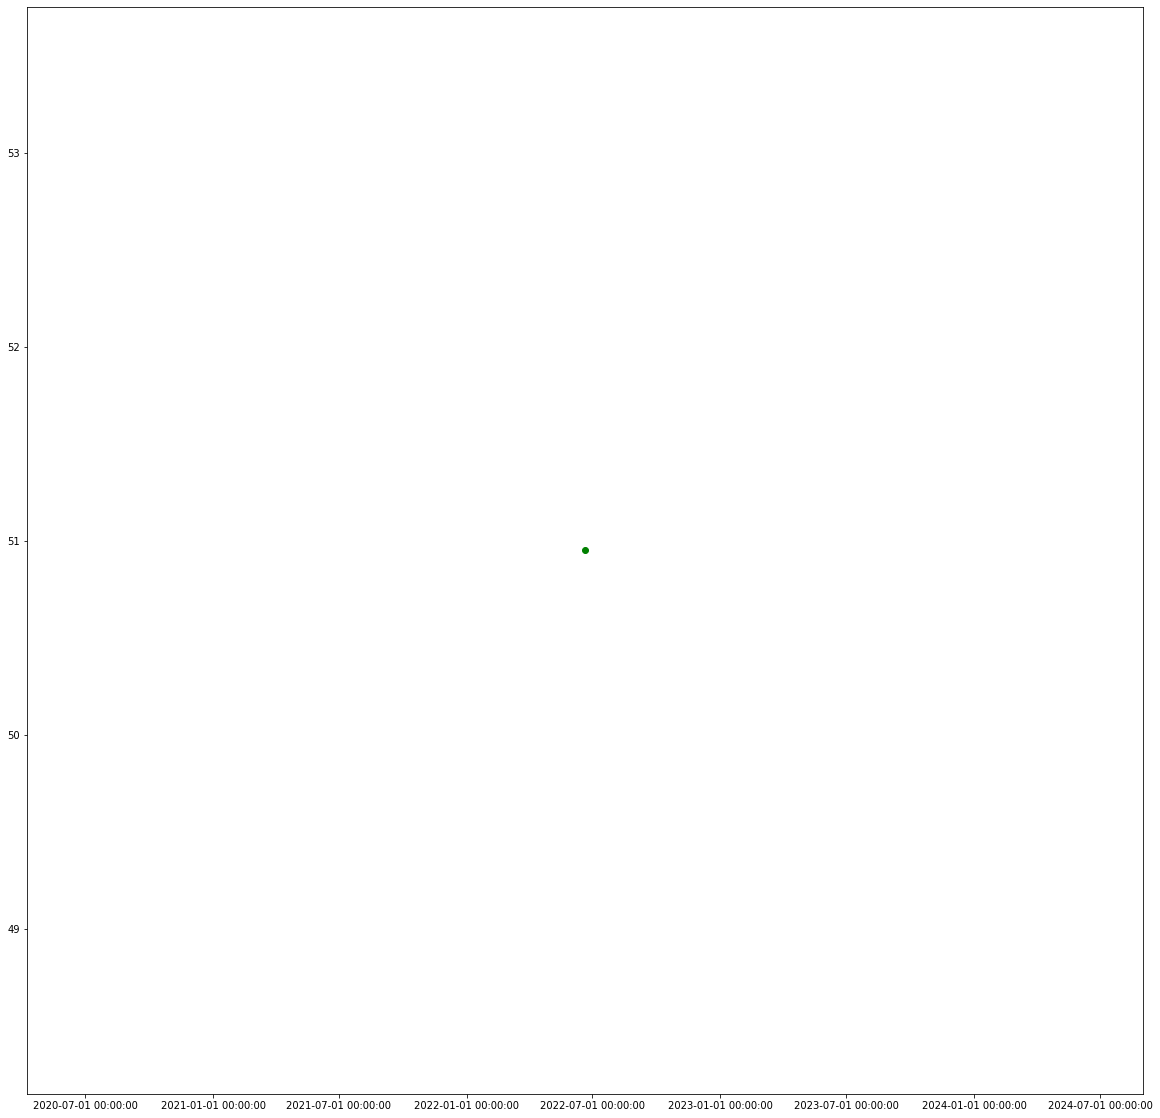

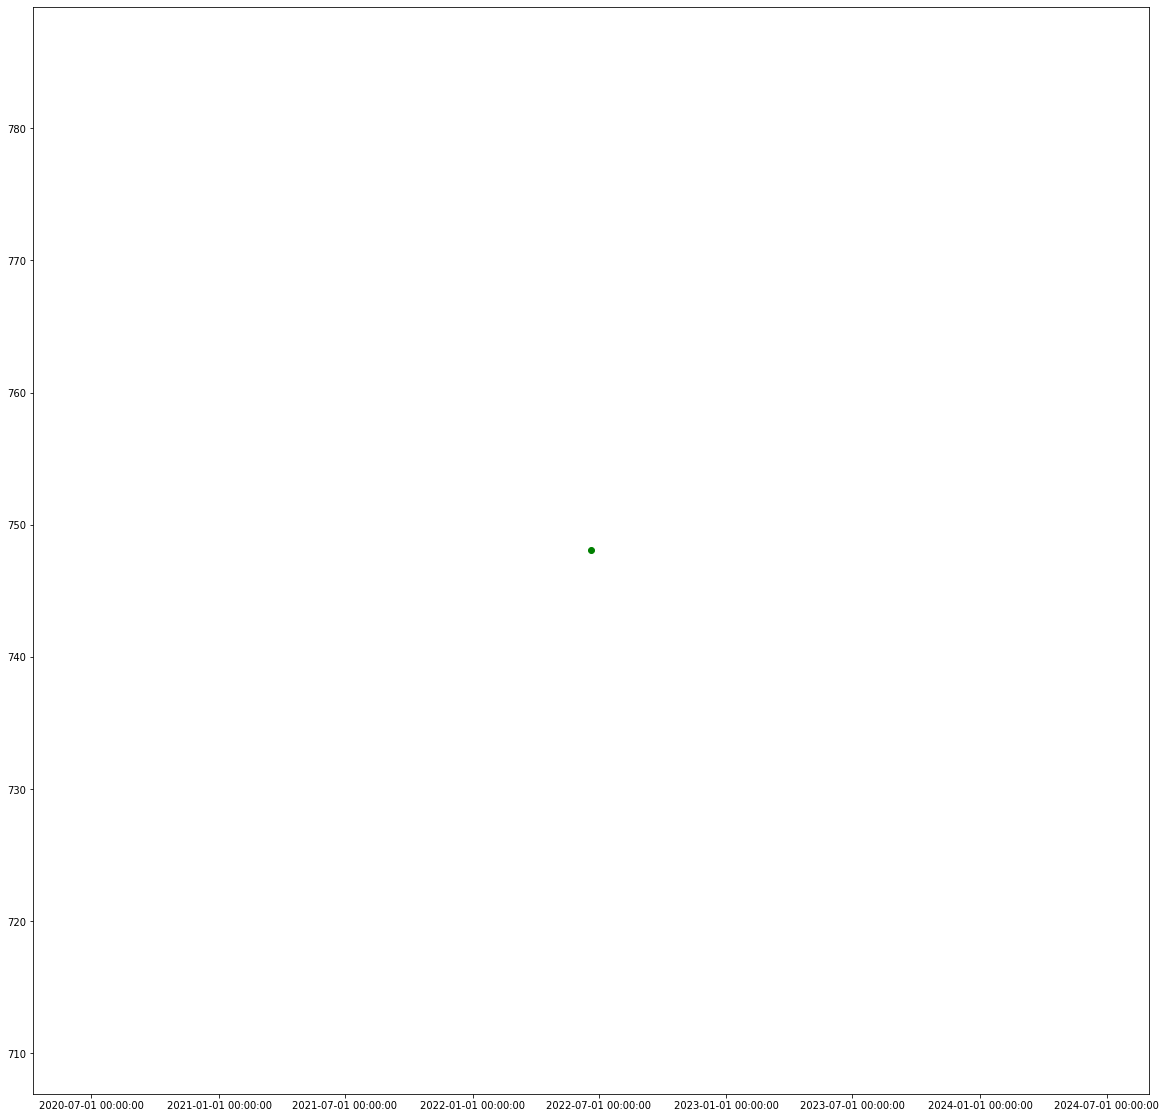

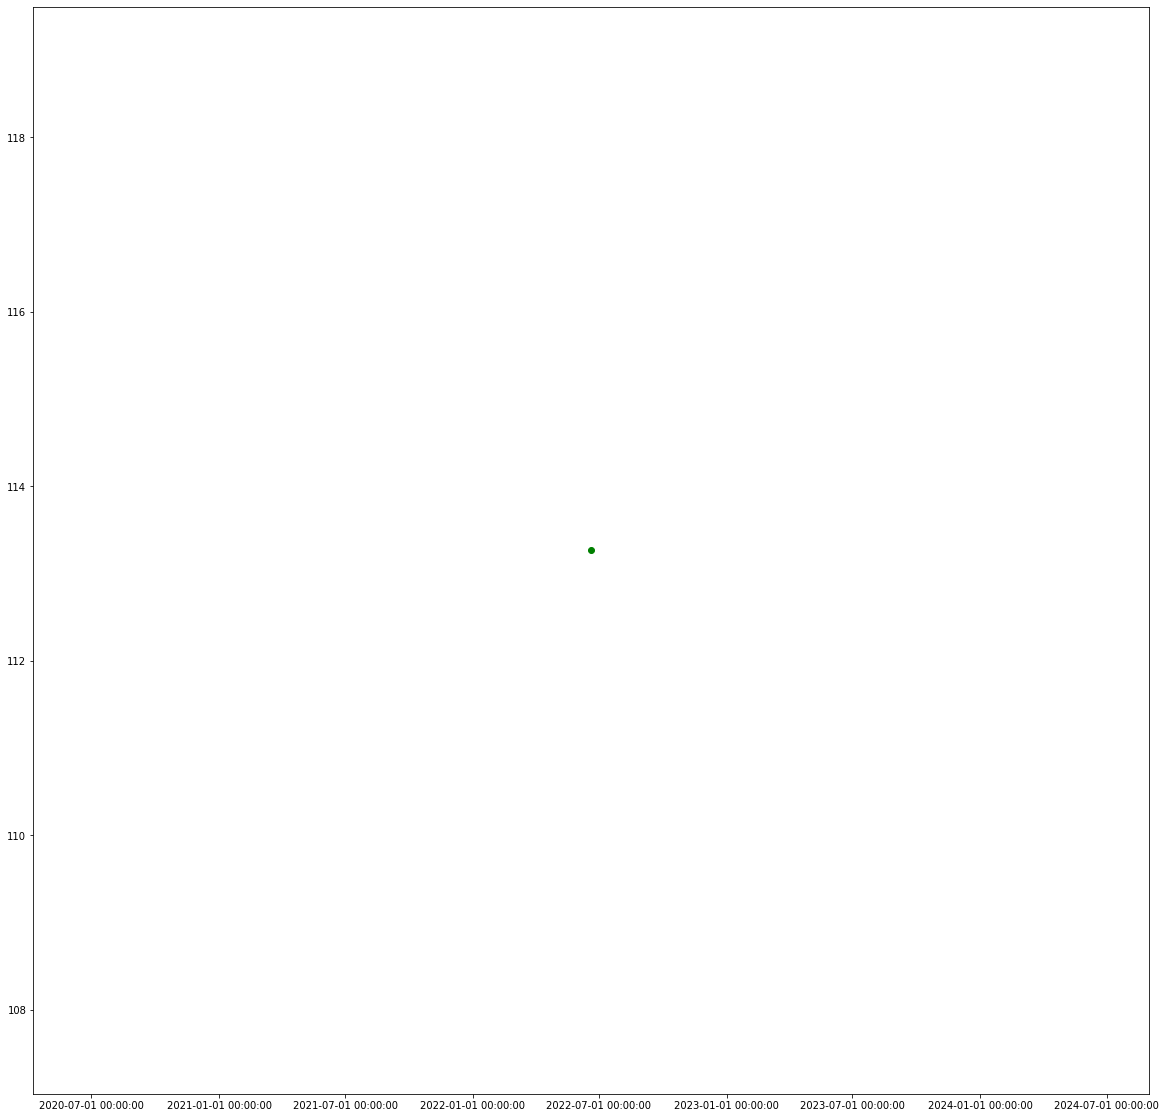

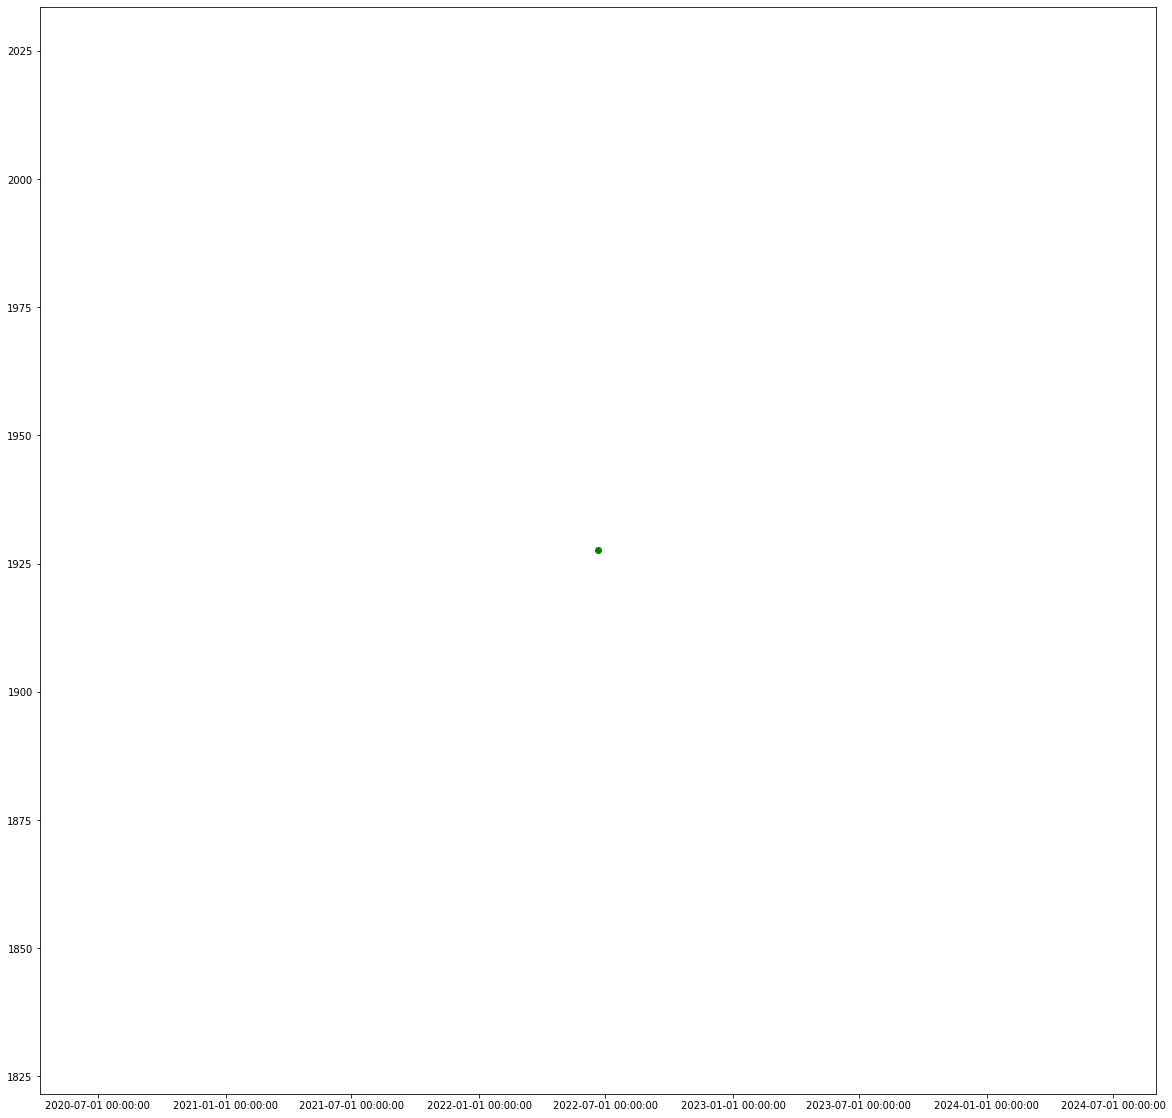

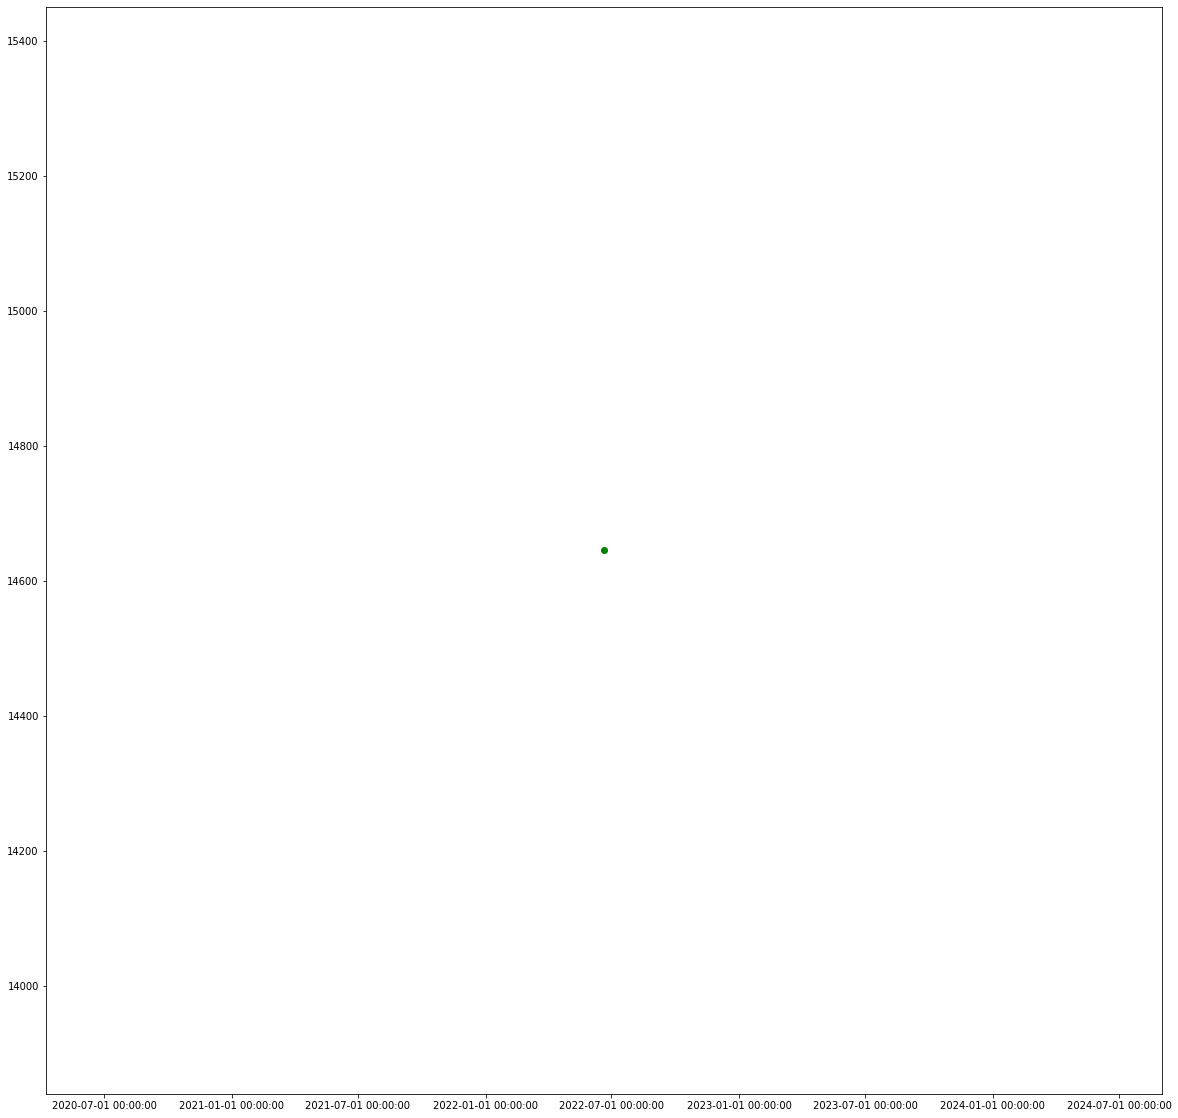

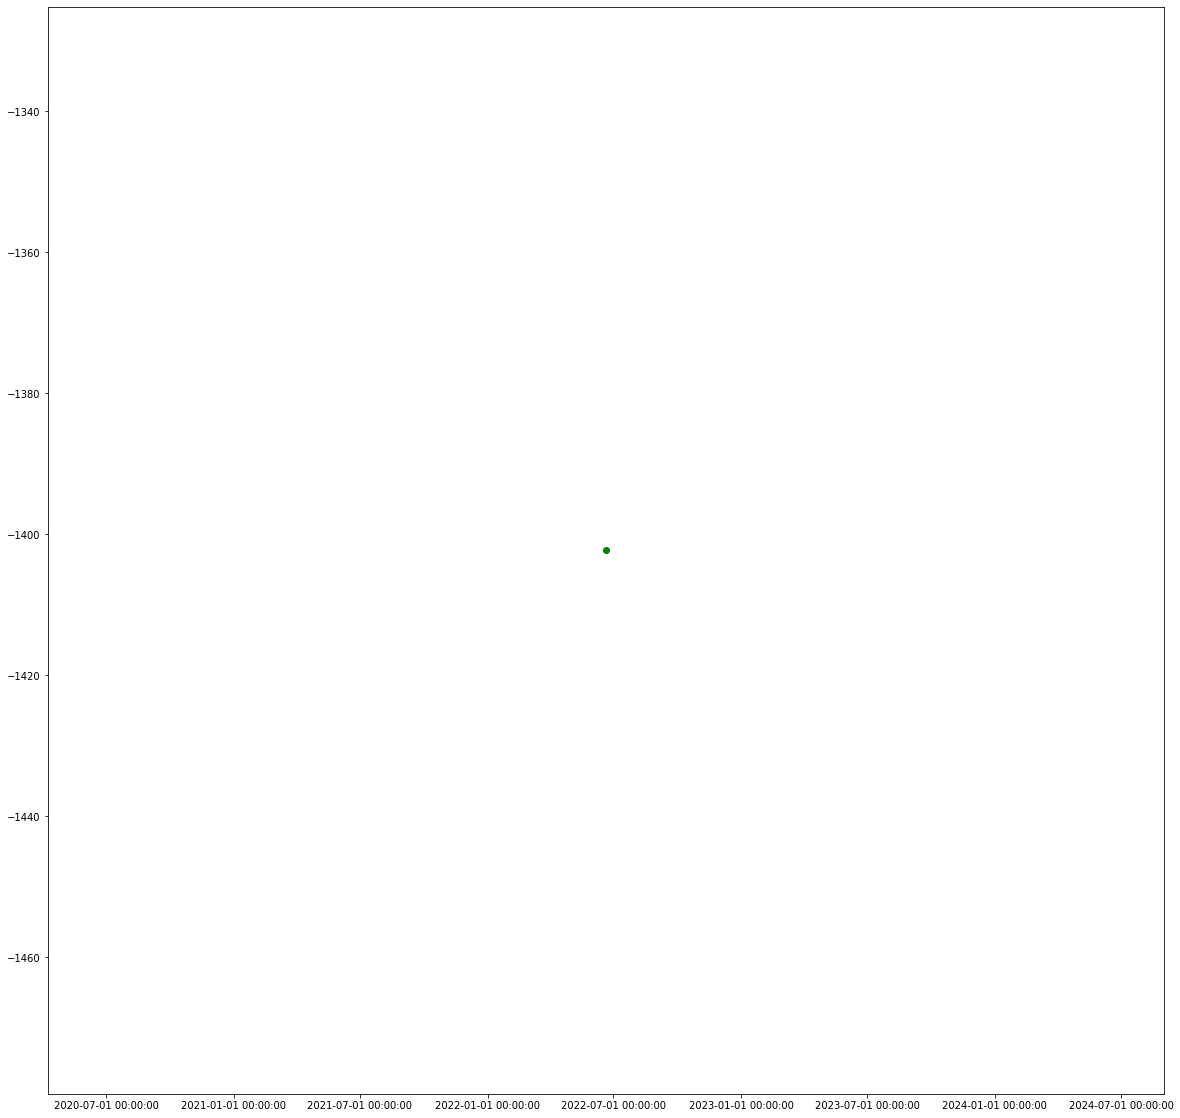

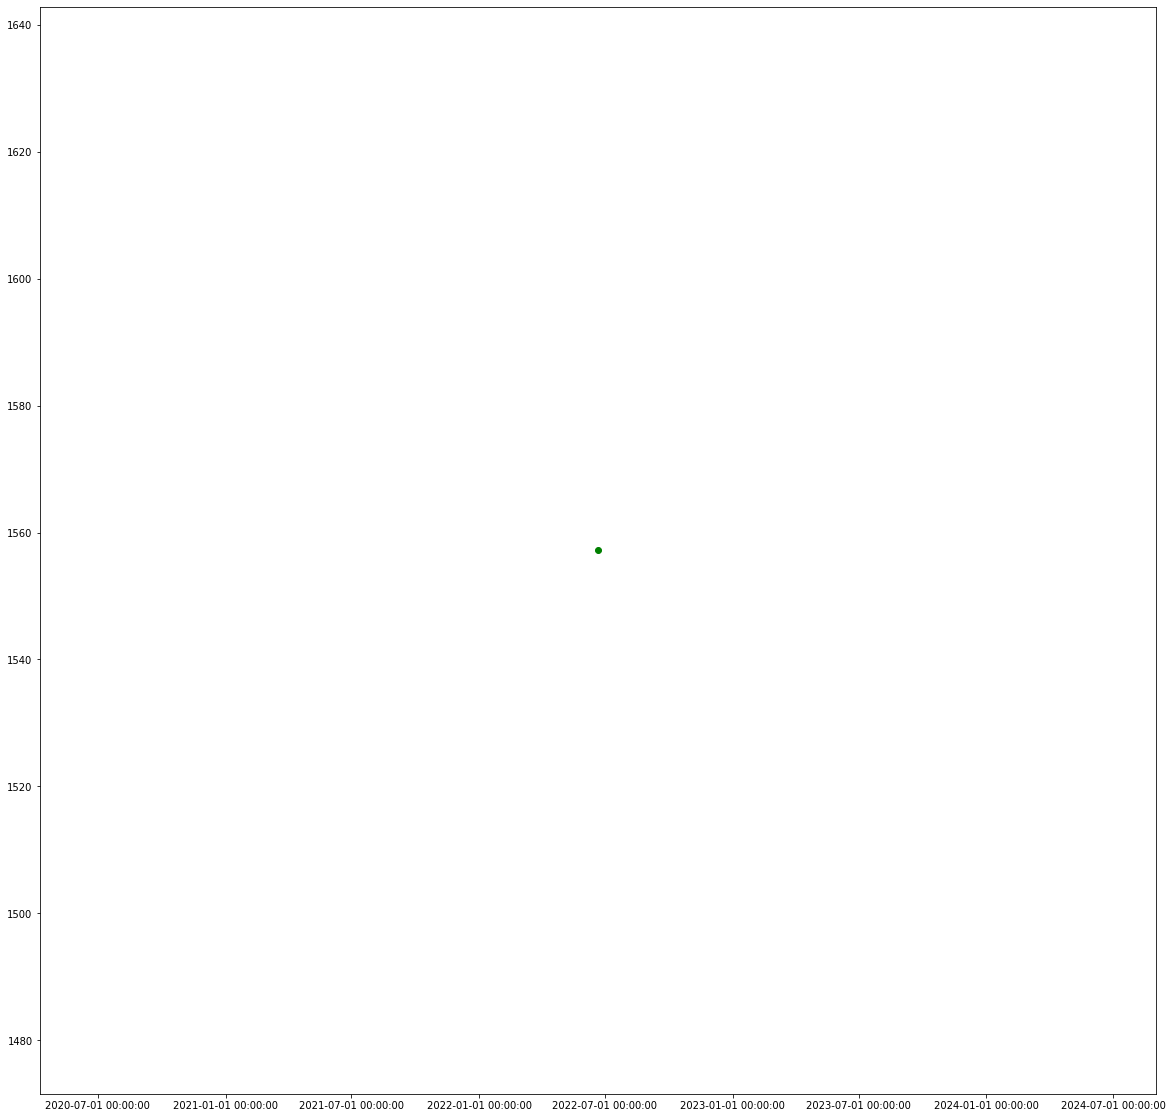

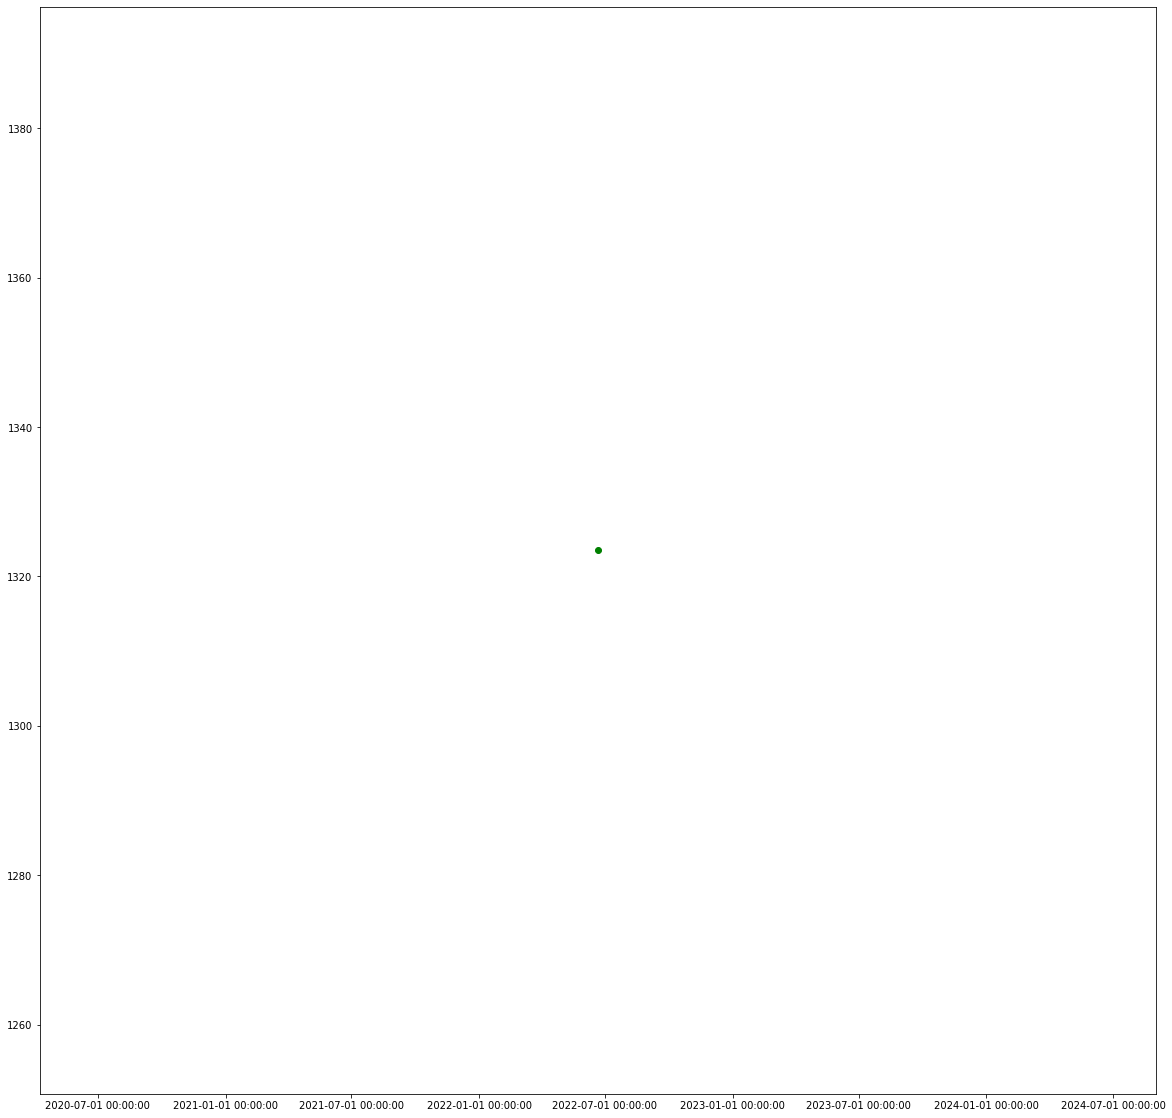

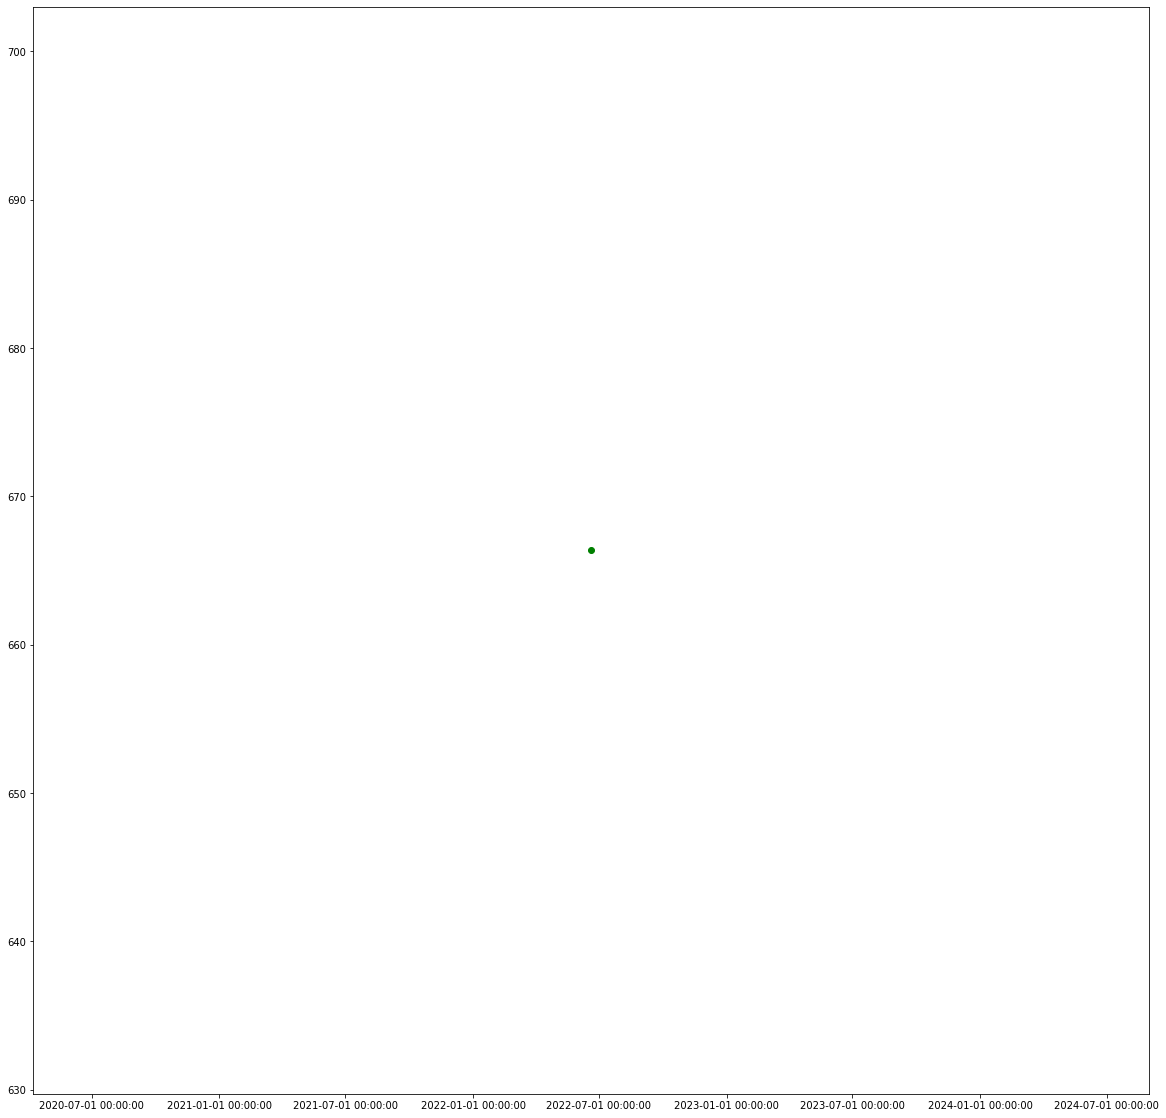

In [7]:
## iterratinf a target, same date and different objects

## plotting
target_values = columns_instances.keys()
target = 92

## dates of observation
dates = list(columns_instances[target].keys())

# for date in dates:
date = dates[0]
color = {1:'b',2:'g',3:'r',4:'k'}

## for in object id
instance1 = columns_instances[target][date]
objects_ids = instance1.object_id.unique()

# objects_id1 = objects_ids[0]
for objects_id1 in objects_ids:
    
    instance = instance1[instance1['object_id']==objects_id1]
    plt.figure(figsize=(20,20))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

    for passband1 in range(1, 5):
        values = instance[instance['passband']==passband1].flux.values
        xaxis =  instance[instance['passband']==passband1].datatime.values
        plt.plot_date(xaxis, values, c=color[passband1])

    plt.show()

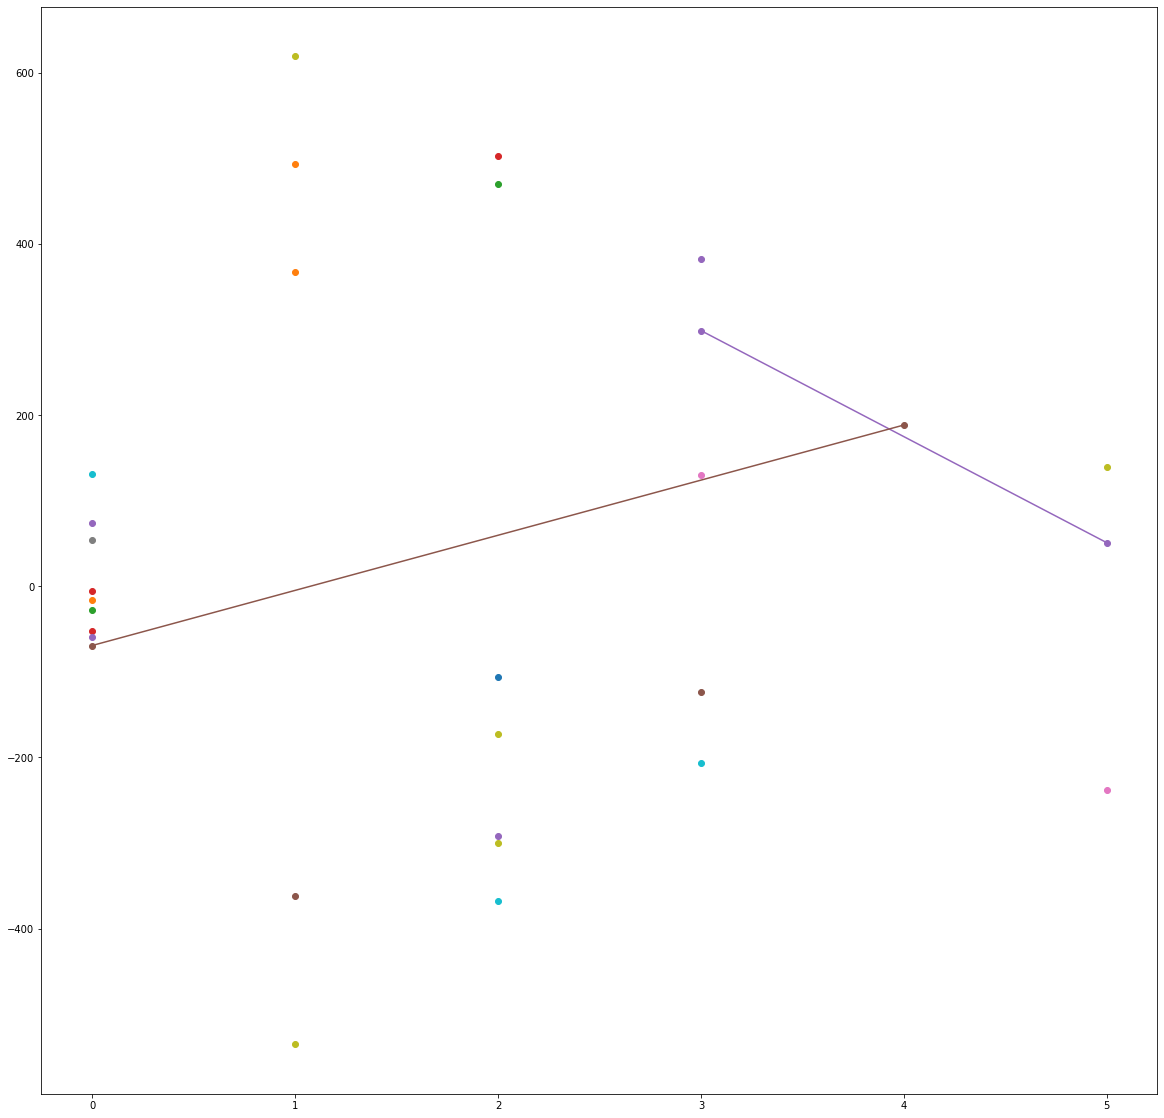

In [33]:
## iterratinf a target, all date and same objects

## plotting
target_values = columns_instances.keys()
target = 92
object_id = 615

## dates of observation
dates = list(columns_instances[target].keys())

plt.figure(figsize=(20,20))

for date in dates:
    
    instance1 = columns_instances[target][date]
    objects_ids = instance1.object_id.unique()

    if object_id in objects_ids:
        instance = instance1[instance1['object_id']==objects_id1]
        instance = instance.sort_values('passband')
        values = instance.flux.values
        xaxis =  instance.passband.values
        plt.plot(xaxis, values, '-o')

plt.show()

In [34]:
objects_ids

array([88194361])

In [35]:
instance1

,object_id,flux,passband,datatime,datatime_day
1180357,88194361,-268.412598,5,2022-02-12 00:30:48.959999811,2022-02-12
